In [1]:
!pip install accelerate transformers torch nltk indic-nlp-library sacremoses sacrebleu flash_attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 44.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 5.8 MB/s eta 0:00:00

In [2]:
from datasets import load_dataset

In [4]:
d1 = load_dataset("ABHIiiii1/En_Ml_TransDataFiltered2")
d1

DatasetDict({
    train: Dataset({
        features: ['src', 'tgt'],
        num_rows: 35442
    })
    test: Dataset({
        features: ['src', 'tgt'],
        num_rows: 4875
    })
    validation: Dataset({
        features: ['src', 'tgt'],
        num_rows: 4903
    })
})

In [19]:
d1['train'][-1000]

{'src': 'Four persons have been arrested in connection with the case so far.',
 'tgt': 'ഈ കേസുമായി ബന്ധപ്പെട്ട് ഇതുവരെ നാലു പേരെ അറസ്റ്റു ചെയ്തിട്ടുണ്ട്.'}

In [6]:
d2 = load_dataset("Muennighoff/flores200" , 'eng_Latn-mal_Mlym')
d2

DatasetDict({
    dev: Dataset({
        features: ['id', 'URL', 'domain', 'topic', 'has_image', 'has_hyperlink', 'sentence_eng_Latn', 'sentence_mal_Mlym'],
        num_rows: 997
    })
    devtest: Dataset({
        features: ['id', 'URL', 'domain', 'topic', 'has_image', 'has_hyperlink', 'sentence_eng_Latn', 'sentence_mal_Mlym'],
        num_rows: 1012
    })
})

In [20]:
d2['dev'][4]

{'id': 5,
 'URL': 'https://en.wikinews.org/wiki/Fighter_jet_crashes_during_Children%27s_Day_airshow_in_Thailand',
 'domain': 'wikinews',
 'topic': 'accident',
 'has_image': 0,
 'has_hyperlink': 0,
 'sentence_eng_Latn': 'Local media reports an airport fire vehicle rolled over while responding.',
 'sentence_mal_Mlym': 'സംഭവ സ്ഥലത്തേക്ക് കുതിക്കുന്ന സമയത്ത് ഒരു എയർപോർട്ട് ഫയർ വാഹനം കീഴ്\u200cമേൽ മറിഞ്ഞതായി പ്രാദേശിക മാധ്യമങ്ങൾ റിപ്പോർട്ട് ചെയ്യുന്നു.'}

In [8]:
d3 = load_dataset("ai4bharat/IN22-Conv", 'eng_Latn-mal_Mlym')
d3

DatasetDict({
    conv: Dataset({
        features: ['id', 'doc_id', 'sent_id', 'topic', 'domain', 'prompt', 'scenario', 'speaker', 'turn', 'sentence_eng_Latn', 'sentence_mal_Mlym'],
        num_rows: 1503
    })
})

In [25]:
d3['conv'][8]

{'id': 9,
 'doc_id': 0,
 'sent_id': 9,
 'topic': 'Festivities',
 'domain': 'culture',
 'prompt': '14th April a holiday',
 'scenario': 'Historical importance',
 'speaker': 1,
 'turn': 2,
 'sentence_eng_Latn': 'Are all schools, colleges and offices closed tomorrow?',
 'sentence_mal_Mlym': 'സ്കൂളിനും കോളേജിനും ഓഫീസിനും എല്ലാം നാളെ അവധിയാണോ?'}

In [27]:
d4 = load_dataset("ai4bharat/IN22-Gen", 'eng_Latn-mal_Mlym')
d4

DatasetDict({
    gen: Dataset({
        features: ['id', 'context', 'source', 'url', 'domain', 'num_words', 'bucket', 'sentence_eng_Latn', 'sentence_mal_Mlym'],
        num_rows: 1024
    })
})

In [32]:
d4['gen'][14]

{'id': 15,
 'context': "In 1989 when there was a roaring movement for celebration of 300 years of Calcutta some eminent personalities of Howrah framed a society titled 'Howrah Jela Itihas Pranayan, Unnayan 0 Smarak Samity' and Asitbabu became the President of this Society. The main purpose of the Samity was to pen down a complete history of Howrah, the twin city of Kolkata. Professor Asitkumar Bandyopadhyay played pioneering role in compiling the complete history of his hometown Howrah titled as Howrah Saharer Itibrrito (First and Second Volume) in 1994 & 1995.",
 'source': 'web',
 'url': '',
 'domain': 'culture',
 'num_words': 29,
 'bucket': '26 - 45',
 'sentence_eng_Latn': 'Professor Asitkumar Bandyopadhyay played a pioneering role in compiling the complete history of his hometown Howrah titled as Howrah Saharer Itibrrito (First and Second Volume) in 1994 & 1995.',
 'sentence_mal_Mlym': '1994, 1995 എന്നീ വർഷങ്ങളിൽ, ഹൗറ സഹരേർ ഇതിബ്രിത്തോ (ഒന്ന്, രണ്ട് വാള്യങ്ങൾ) എന്ന ഗ്രന്ഥനാമത്തിൽ പ്

In [9]:
FltDataTst = d1['test'].select(range(1000)).to_dict()

In [10]:
FltDataVld = d1['validation'].select(range(1000)).to_dict()

In [1]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast, MarianMTModel, MarianTokenizer

In [2]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

Tokenizer11 = AutoTokenizer.from_pretrained("ABHIiiii1/mbart50-Finetuned-En-Ml-trans-11")
FinalModel11 = AutoModelForSeq2SeqLM.from_pretrained("ABHIiiii1/mbart50-Finetuned-En-Ml-trans-11")

tokenizer_config.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/992 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

In [3]:
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
FinalModel11 = FinalModel11.to(DEVICE)

In [4]:
def translator11(w):
  text = w
  input_ids = Tokenizer11(text, return_tensors="pt").input_ids.to(DEVICE)
  translated = FinalModel11.generate(input_ids)
  tgt_text = Tokenizer11.batch_decode(translated, skip_special_tokens=True)[0]
  return tgt_text

In [37]:
FinalModel11 = MBartForConditionalGeneration.from_pretrained('ABHIiiii1/mbart50-Finetuned-En-Ml-trans-11')

Tokenizer11 = MBart50TokenizerFast.from_pretrained('ABHIiiii1/mbart50-Finetuned-En-Ml-trans-11', src_lang="en_XX")

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/992 [00:00<?, ?B/s]

In [38]:
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
FinalModel11 = FinalModel11.to(DEVICE)

In [39]:
def translator11(w):
  text = w
  input_ids = Tokenizer11(text, return_tensors="pt").input_ids.to(DEVICE)
  translated = FinalModel11.generate(input_ids)
  tgt_text = Tokenizer11.batch_decode(translated, skip_special_tokens=True)[0]
  return tgt_text

In [5]:
model1 = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
tokenizer1 = MBart50TokenizerFast.from_pretrained('facebook/mbart-large-50', src_lang="en_XX")

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

In [6]:
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model1 = model1.to(DEVICE)

In [7]:
def translator1(w, target_lang="ml_IN"):
  text = w
  input_ids = tokenizer1(text, return_tensors="pt").input_ids.to(DEVICE)
  translated = model1.generate(input_ids, forced_bos_token_id=tokenizer1.lang_code_to_id[target_lang])
  tgt_text = tokenizer1.batch_decode(translated, skip_special_tokens=True)[0]
  return tgt_text

In [8]:
tokenizer2 = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-en-ml')
model2 = MarianMTModel.from_pretrained('Helsinki-NLP/opus-mt-en-ml')

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/449k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/614k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/956k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/229M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [9]:
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model2 = model2.to(DEVICE)

In [10]:
def translator2(text):
    inputs = tokenizer2(text, return_tensors="pt").to(DEVICE)
    outputs = model2.generate(**inputs)
    translated_text = tokenizer2.decode(outputs[0], skip_special_tokens=True)
    return translated_text

In [138]:
%cd /kaggle/input

/kaggle/input


In [114]:
%cd /kaggle/input/indictokenizer/IndicTransTokenizer-main

/kaggle/input/indictokenizer/IndicTransTokenizer-main


In [115]:
import torch
from transformers import (
    AutoModelForSeq2SeqLM,
    AutoTokenizer,
)
from IndicTransTokenizer import IndicProcessor

model_name = "ai4bharat/indictrans2-en-indic-1B"
tokenizer3 = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model3 = AutoModelForSeq2SeqLM.from_pretrained(model_name, trust_remote_code=True)

ip = IndicProcessor(inference=True)

2024-06-05 12:51:18.795272: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 12:51:18.795387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 12:51:18.923566: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

tokenization_indictrans.py:   0%|          | 0.00/8.10k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-en-indic-1B:
- tokenization_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


dict.SRC.json:   0%|          | 0.00/645k [00:00<?, ?B/s]

dict.TGT.json:   0%|          | 0.00/3.39M [00:00<?, ?B/s]

model.SRC:   0%|          | 0.00/759k [00:00<?, ?B/s]

model.TGT:   0%|          | 0.00/3.26M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

configuration_indictrans.py:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-en-indic-1B:
- configuration_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_indictrans.py:   0%|          | 0.00/79.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-en-indic-1B:
- modeling_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/4.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

In [116]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model3 = model3.to(DEVICE)

In [117]:
src_lang, tgt_lang = "eng_Latn", "mal_Mlym"

def translator3(text):
    batch = ip.preprocess_batch(
        [text],
        src_lang=src_lang,
        tgt_lang=tgt_lang,
    )
    inputs = tokenizer3(
        batch,
        truncation=True,
        padding="longest",
        return_tensors="pt",
        return_attention_mask=True,
    ).to(DEVICE)
    with torch.no_grad():
        outputs = model3.generate(
            **inputs,
            use_cache=True,
            min_length=0,
            max_length=256,
            num_beams=5,
            num_return_sequences=1,
        )
    with tokenizer3.as_target_tokenizer():
        generated_tokens = tokenizer3.batch_decode(
            outputs.detach().cpu().tolist(),
            skip_special_tokens=True,
            clean_up_tokenization_spaces=True,
        )
    translations = ip.postprocess_batch(generated_tokens, lang=tgt_lang)
    return translations[0]

In [11]:
text11="Kerala is beautiful"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  കേരളം സുന്ദരമാണ്


Base model :  கேரளം മനോഹരമാണ്.


Helsinki-NLP model :  കേരളം മനോഹരം


In [13]:
text11="what is your name ?"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  എന്താ നിന് റെ പേര്?


Base model :  എന്താ നിന് റെ പേര്?


Helsinki-NLP model :  എന്താ നിന്റെ പേര്?


In [14]:
text11="Kerala, a state on India's tropical Malabar Coast"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  ഇന്ത്യയിലെ ഉഷ്ണമേഖലാ മലബാർ തീരത്തുള്ള ഒരു സംസ്ഥാനമായ കേരള


Base model :  கேரளா, ഇന്ത്യയുടെ ഉഷ്ണമേഖലാ മലാബാർ തീരത്തെ ഒരു സംസ്ഥാനം.


Helsinki-NLP model :  ഇന്ത്യയിലെ ഉഷ് ണമേഖലാ മലബാർ തീരത്തെ ഒരു സംസ്ഥാനം


In [15]:
text11="Let's go for shopping"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  നമുക്ക് ഷോപ്പിംഗിന് പോകാം.


Base model :  നമുക്ക് ഷോപ്പിംഗിനു പോകാം.


Helsinki-NLP model :  നമുക്ക് ഷോപ്പിങ്ങിനു പോകാം


In [16]:
text11="Do you have a Facebook account?"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  നിനക്കൊരു ഫെയ് സ്ബുക്ക് അക്കൗണ്ടുണ്ടോ?


Base model :  നിനക്കൊരു فیس بوک അക്കൗണ്ട് ഉണ്ടോ?


Helsinki-NLP model :  ഫേസ്ബുക്ക് അക്കൌണ്ട് ഉണ്ടോ?


In [17]:
text11="Nurture meaningful connections with loved ones"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  പ്രിയപ്പെട്ടവരുമായി അർഥവത്തായ ബന്ധങ്ങൾ വളർത്തുക


Base model :  സ്നേഹിതരുമായുള്ള അർത്ഥമായ ബന്ധങ്ങളെ വളർത്തുക.


Helsinki-NLP model :  പ്രിയപ്പെട്ടവരുമായി അർഥവത്തായ ബന്ധം സ്ഥാപിക്കുക


In [18]:
text11="Kerala is a hub for Ayurvedic medicine and wellness tourism"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  ആയുർവേദ ചികിത്സയുടെയും ആരോഗ്യസഞ്ചാരത്തിന്റെയും കേന്ദ്രസ്ഥാനമാണ് കേരളം


Base model :  கேரளം ആയുര് വഡിക് മെഡിക്കിന് റെ കേന്ദ്രമാണ്.. ആയുര് വഡിക് മെഡിക്കിന് റെ കേന്ദ്രം.


Helsinki-NLP model :  കേരള ഔഷധങ്ങളുടെ ഒരു ഹബ്ബാണ് അയൂറക് മരുന്നും നല്ല ടൂറിസം ടൂറിസം


In [19]:
text11="The distance to the center of the earth from the equator is 6,378 km"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  ഭൂമധ്യരേഖയിൽ നിന്ന് ഭൂമിയുടെ മധ്യത്തിലേക്കുള്ള ദൂരം 6,378 കിലോമീറ്റർ ആണ്


Base model :  ഭൂപര് വതത്തില് നിന്നും ഭൂമിയുടെ കേന്ദ്രത്തില് നിന്നും 6,378 കിലോമീറ്റര് അകലെയാണ്


Helsinki-NLP model :  ഭൂമദ്ധ്യരേഖയിൽ നിന്നുള്ള ദൂരം 6,378 കിലോമീറ്ററാണ്


In [20]:
text11="People began helping each other without hesitation"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  ആളുകൾ മടിക്കാതെ പരസ്പരം സഹായിക്കുന്നു തുടങ്ങി


Base model :  ആളുകള് പരസ്പരം സഹായിക്കാന് വിശ്രമമില്ലാതെ തുടങ്ങി.


Helsinki-NLP model :  ബുദ്ധിമുട്ടില്ലാതെ ആളുകൾ പരസ് പരം സഹായിക്കിത്തുടങ്ങി


In [28]:
text11="Weather is the state of the atmosphere, including temperature, atmospheric pressure, wind, humidity, precipitation, and cloud cover."
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  കാലാവസ്ഥ അന്തരീക്ഷത്തിന്റെ അവസ്ഥയാണ്, താപനില, അന്തരീക്ഷത്തിലെ സമ്മർദ്ദം, കാറ്റ്, ഈർപ്പം, മഴ, മേഘങ്ങൾ എന്നിവ ഉൾപ്പെടുന്നു.


Base model :  കാലാവസ്ഥയാണ് അന്തരീക്ഷത്തിന്റെ അവസ്ഥ, താപനില, അന്തരീക്ഷസമ്മര് ദ്ദം, കാറ്റ്, മണം, മഴ, മേഘങ്ങള്.


Helsinki-NLP model :  ഉഷ് ണമേഖലാ അന്തരീക്ഷം, അന്തരീക്ഷ മർദം, അന്തരീക്ഷം, അന്തരീക്ഷം, അന്തരീക്ഷം, അന്തരീക്ഷം, അന്തരീക്ഷം, അന്തരീക്ഷം, അന്തരീക്ഷം, അന്തരീക്ഷം, ഉഷ് ണമേഖല, മഴക്കാടുകൾ, മേഘങ്ങൾ എന്നിവയെല്ലാം ഉൾപ്പെടെയുള്ള അന്തരീക്ഷത്തിന്റെ അവസ്ഥയാണ് കാലാവസ്ഥ.


In [29]:
text11="In the desert existed a rose and a cactus. The beautiful rose would take every opportunity to insult the cactus."
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  മരുഭൂമിയിൽ ഒരു റോസാപ്പൂവും കാക്ടസും ഉണ്ടായിരുന്നു. മനോഹരമായ റോസാപ്പൂ കാക്ടസിനെ അപമാനിക്കാൻ എല്ലാ അവസരങ്ങളും ഉപയോഗിക്കും.


Base model :  മരുഭൂമിയില് ഒരു റോസയും ഒരു കാക്ടസും ഉണ്ടായിരുന്നു.


Helsinki-NLP model :  മരുഭൂപ്രദേശത്ത് ഒരു റോസാപ്പൂവും കൈപ്പറ്റും ഉണ്ടായിരുന്നു.


In [21]:
text11="One of the central concepts in chemistry is the atom"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  കെമിസ്ട്രിയുടെ കേന്ദ്ര ആശയങ്ങളിലൊന്നാണ് ആറ്റം


Base model :  കെമിസ്ട്രിയുടെ ഒരു പ്രധാന ആശയം ആറ്റം ആണ്.


Helsinki-NLP model :  രസതന്ത്രത്തിലെ കേന്ദ്ര ആശയങ്ങളിൽ ഒന്നാണ് ആറ്റം


In [22]:
text11="Organic chemistry, for example, is the study of carbon-containing compounds"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  ഉദാഹരണത്തിന്, കാർബൺ അടങ്ങുന്ന സംയുക്തങ്ങളെക്കുറിച്ചുള്ള പഠനമാണ് ജൈവകീയതന്ത്രം


Base model :  ഉദാഹരണത്തിന്, ഓര് ബല് കെമിസ്ട്രി, കാര് ബണ് നിര് മ്മിക്കുന്ന വസ്തുക്കളുടെ പഠനമാണ്.


Helsinki-NLP model :  ഉദാഹരണത്തിന് കാർബൺ-കോമഡിങ്ങ് സംയുക്തങ്ങളുടെ പഠനമാണ് ഓർഗാനിക് രസതന്ത്രം


In [23]:
text11="Idiyappam, also known as nool puttu, is a traditional Kerala dish made from rice flour"
print("Finetuned model : ",translator11(text11))
print('\n')
print("Base model : ",translator1(text11))
print('\n')
print("Helsinki-NLP model : ",translator2(text11))

Finetuned model :  അരിപ്പൊടിയിൽ നിന്നുണ്ടാക്കുന്ന ഒരു പരമ്പരാഗത കേരള വിഭവമാണ് ഐഡിയപ്പാം, നാൽ പുട്ട് എന്നും അറിയപ്പെടുന്നു


Base model :  ഇഡിയാപ്പം, അയോള് പോട്ട് (Aal Puttu) എന്നറിയപ്പെടുന്ന, ഒരു കെറാക്കിന് റെ പാരമ്പര്യ പാചകം, അരി ഉപ്പ് കൊണ്ടുണ്ടാക്കിയതാണ്


Helsinki-NLP model :  നൂൽപാറ്റ് എന്ന പേരിൽ അറിയപ്പെടുന്ന ഇഡ്യാന്യൂപം ചോലയിൽ ധാന്യം ഉത് പാദിപ്പിക്കുന്ന ഒരു പരമ്പരാഗത വിഭവമാണ്


In [16]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.chrf_score import corpus_chrf

def translate_texts(translator, dataset):
    tgt_texts, trans_texts = [], []

    for src_text, tgt_text in zip(dataset['src'], dataset['tgt']):
        translated_text = translator(src_text)
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

#for IN22 conv and gen
def translate_texts2(translator, dataset):
    tgt_texts, trans_texts = [], []

    for src_text, tgt_text in zip(dataset['sentence_eng_Latn'], dataset['sentence_mal_Mlym']):
        translated_text = translator(src_text)
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

def bleu_score(tgt_texts, trans_texts):
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_text2 = [translated_text.split() for translated_text in trans_texts]

    bleu_dic = {}
    bleu_dic['1-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(1.0, 0, 0, 0))
    bleu_dic['1-2-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.5, 0.5, 0, 0))
    bleu_dic['1-3-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.3, 0.3, 0.3, 0))
    bleu_dic['1-4-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.25, 0.25, 0.25, 0.25))
    return bleu_dic


def bleu_score2(tgt_texts, trans_texts):
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_text2 = [translated_text.split() for translated_text in trans_texts]

    bleu_dic = {}
    bleu_dic['1-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(1.0, 0, 0, 0))
    bleu_dic['1-2-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.5, 0.5, 0, 0))
    bleu_dic['1-3-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.3, 0.3, 0.3, 0))
    bleu_dic['1-4-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.25, 0.25, 0.25, 0.25))
    
    average_bleu = sum(bleu_dic.values()) / len(bleu_dic)
    bleu_dic['average'] = average_bleu
    
    return bleu_dic

def bleu_score3(tgt_texts, trans_texts):
    # Prepare the target and translated texts for BLEU calculation
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_text2 = [translated_text.split() for translated_text in trans_texts]

    # Calculate BLEU scores for different n-gram weights
    bleu_dic = {}
    bleu_dic['BLEU-1'] = corpus_bleu(tgt_texts2, trans_text2, weights=(1.0, 0, 0, 0))
    bleu_dic['BLEU-2'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.5, 0.5, 0, 0))
    bleu_dic['BLEU-3'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.33, 0.33, 0.34, 0))
    bleu_dic['BLEU-4'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.25, 0.25, 0.25, 0.25))

    # Calculate the average BLEU score as per the paper's formula
    average_bleu = (bleu_dic['BLEU-1'] + bleu_dic['BLEU-2'] + bleu_dic['BLEU-3'] + bleu_dic['BLEU-4']) / 4
    bleu_dic['BLEU_Avg'] = average_bleu * 100  # Multiplying by 100 to match the paper's scaling

    return bleu_dic

def chrf_score(tgt_texts, trans_texts):
    chrf_dic = {}
    chrf_dic['chrf'] = corpus_chrf([list(tgt_texts)], [list(trans_texts)])
    return chrf_dic

def chrf_score2(tgt_texts, trans_texts):
    chrf_dic = {}
    chrf_dic['chrf'] = corpus_chrf(tgt_texts, trans_texts)
    return chrf_dic


import matplotlib.pyplot as plt
    
def plot_bleu_scores(bleu_val, model_name):
    bleu_val_copy = bleu_val.copy()
    bleu_val_copy.pop('average', None)
    
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val_copy.keys(), bleu_val_copy.values())
    plt.title(f"BLEU Score of {model_name} Model with the validation data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()

def plot_bleu_scores2(bleu_val, model_name):
    bleu_val_copy = bleu_val.copy()
    bleu_val_copy.pop('average', None)
    
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val_copy.keys(), bleu_val_copy.values())
    plt.title(f"BLEU Score of {model_name} Model with the IN22 data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()
    
def plot_bleu_scores3(bleu_val, model_name):
    bleu_val_copy = bleu_val.copy()
    bleu_val_copy.pop('average', None)
    
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val_copy.keys(), bleu_val_copy.values())
    plt.title(f"BLEU Score of {model_name} Model with the test data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()

def plot_bleu_scores4(bleu_val, model_name):
    bleu_val_copy = bleu_val.copy()
    bleu_val_copy.pop('average', None)
    
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val_copy.keys(), bleu_val_copy.values())
    plt.title(f"BLEU Score of {model_name} Model with the Flores200 data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()    
    
    
def total_bleu_score(bleu_dic):
    total_bleu = sum(bleu_dic.values())
    print("Total BLEU Score: " , total_bleu)

**Fine-Tuned model**

In [97]:
tgt11_texts1, trans11_texts1 = translate_texts(translator11, FltDataVld)

In [98]:
bleu_val1 = bleu_score2(tgt11_texts1, trans11_texts1)
bleu_val1

{'1-grams': 0.39896687936797326,
 '1-2-grams': 0.27246248780720245,
 '1-3-grams': 0.22977343695473498,
 '1-4-grams': 0.14451094774911155,
 'average': 0.26142843796975557}

In [189]:
bleu_val1 = bleu_score3(tgt11_texts1, trans11_texts1)
bleu_val1

{'BLEU-1': 0.39896687936797326,
 'BLEU-2': 0.27246248780720245,
 'BLEU-3': 0.1938356532350869,
 'BLEU-4': 0.14451094774911155,
 'BLEU_Avg': 25.24439920398435}

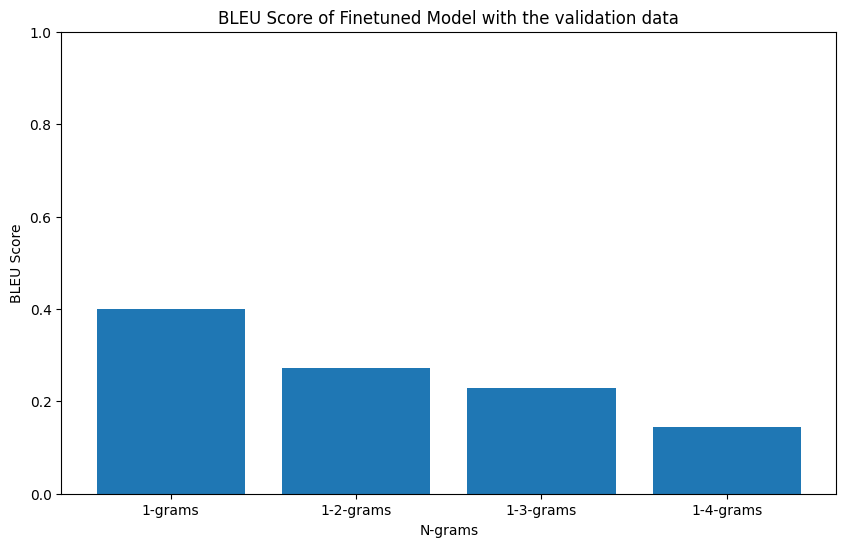

In [99]:
plot_bleu_scores(bleu_val1, 'Finetuned')

In [100]:
total_bleu_score(bleu_val1)

Total BLEU Score:  1.3071421898487778


In [101]:
chrf_val1 = chrf_score(tgt11_texts1, trans11_texts1)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.778431124833123


In [102]:
chrf_val1 = chrf_score2(tgt11_texts1, trans11_texts1)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.6962271489692726


In [103]:
tgt5_texts1_1, trans5_texts1_1 = translate_texts(translator11, FltDataTst)

In [105]:
bleu_val1_1 = bleu_score3(tgt5_texts1_1, trans5_texts1_1)
bleu_val1_1

{'BLEU-1': 0.39869000322130355,
 'BLEU-2': 0.27343987099265493,
 'BLEU-3': 0.19500005195218836,
 'BLEU-4': 0.14693822919126437,
 'BLEU_Avg': 25.351703883935283}

In [106]:
bleu_val1_1 = bleu_score2(tgt5_texts1_1, trans5_texts1_1)
bleu_val1_1

{'1-grams': 0.39869000322130355,
 '1-2-grams': 0.27343987099265493,
 '1-3-grams': 0.23100550050770544,
 '1-4-grams': 0.14693822919126437,
 'average': 0.2625184009782321}

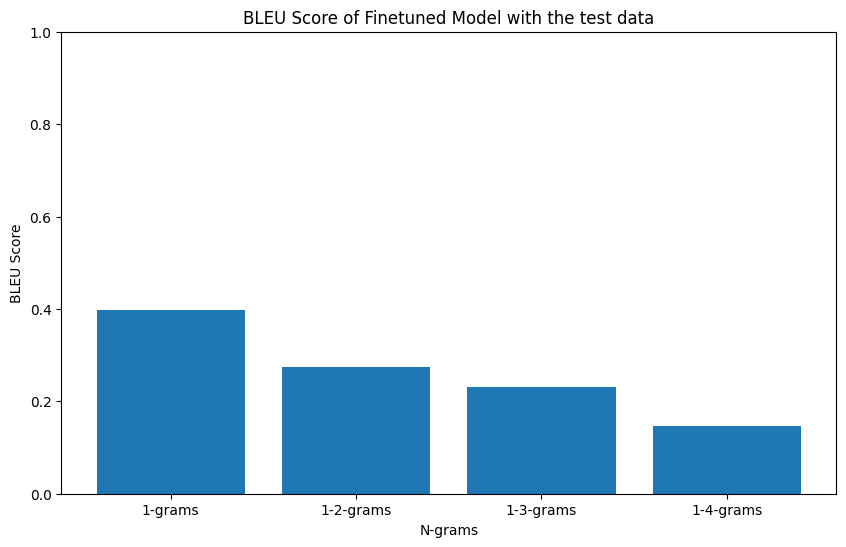

In [107]:
plot_bleu_scores3(bleu_val1_1, 'Finetuned')

In [108]:
total_bleu_score(bleu_val1_1)

Total BLEU Score:  1.3125920048911603


In [109]:
chrf_val1_1 = chrf_score(tgt5_texts1_1, trans5_texts1_1)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.780533790176644


In [111]:
def chrf_score2(tgt_texts, trans_texts):
    chrf_dic = {}
    chrf_dic['chrf'] = corpus_chrf(tgt_texts, trans_texts)
    return chrf_dic

In [112]:
chrf_val1 = chrf_score2(tgt5_texts1_1, trans5_texts1_1)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.8152793614595212


In [17]:
tgt5_texts1_IN22, trans5_texts1_IN22 = translate_texts2(translator1_5, d3['gen'])

In [13]:
bleu_val1_IN22 = bleu_score(tgt5_texts1_IN22, trans5_texts1_IN22)
bleu_val1_IN22

{'1-grams': 0.16705698672911787,
 '1-2-grams': 0.0691858258679361,
 '1-3-grams': 0.04150105670717304,
 '1-4-grams': 0.011294530247595093}

In [22]:
bleu_val1_IN22 = bleu_score2(tgt5_texts1_IN22, trans5_texts1_IN22)
bleu_val1_IN22

{'1-grams': 0.18054966044142615,
 '1-2-grams': 0.08378424655719795,
 '1-3-grams': 0.05704212745780538,
 '1-4-grams': 0.02202811807843178,
 'average': 0.08585103813371532}

In [20]:
bleu_val1_IN22 = bleu_score3(tgt5_texts1_IN22, trans5_texts1_IN22)
bleu_val1_IN22

{'BLEU-1': 0.18054966044142615,
 'BLEU-2': 0.08378424655719795,
 'BLEU-3': 0.04091587997560243,
 'BLEU-4': 0.02202811807843178,
 'BLEU_Avg': 8.181947626316457}

In [23]:
average_score = bleu_val1_IN22.get('average')
print(f"Average BLEU score: {average_score*100:.4f}")

Average BLEU score: 8.5851


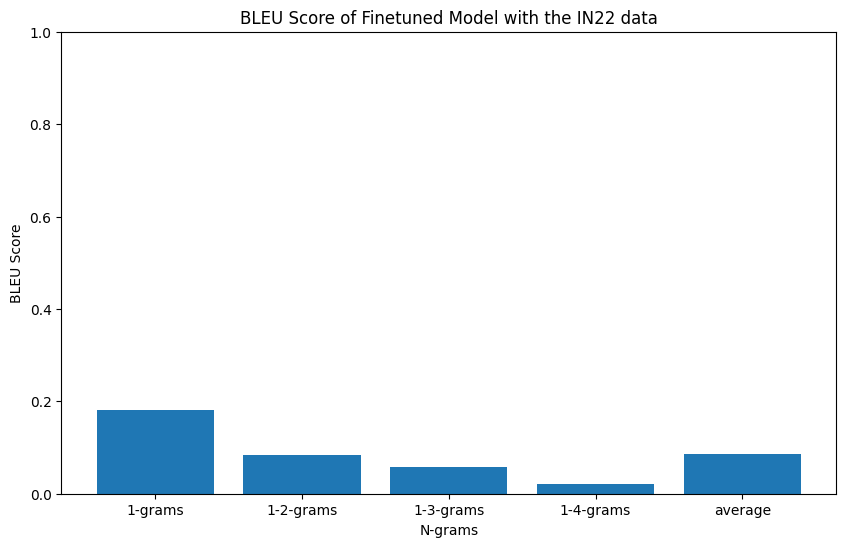

In [24]:
plot_bleu_scores2(bleu_val1_IN22, 'Finetuned')

In [28]:
total_bleu_score(bleu_val1_IN22)

Total BLEU Score:  0.4292551906685766


In [29]:
chrf_val1_1 = chrf_score(tgt5_texts1_IN22, trans5_texts1_IN22)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.6796592462356373


In [114]:
tgt5_texts1_Flores, trans5_texts1_Flores = translate_texts2(translator11, d2['devtest'])

In [115]:
bleu_val1_Flores = bleu_score2(tgt5_texts1_Flores, trans5_texts1_Flores)
bleu_val1_Flores

{'1-grams': 0.3260438689217759,
 '1-2-grams': 0.1932628693494314,
 '1-3-grams': 0.14443627073929433,
 '1-4-grams': 0.07211514249822769,
 'average': 0.18396453787718234}

In [202]:
bleu_val1_Flores = bleu_score3(tgt5_texts1_Flores, trans5_texts1_Flores)
bleu_val1_Flores

{'BLEU-1': 0.3260438689217759,
 'BLEU-2': 0.1932628693494314,
 'BLEU-3': 0.11532146045861688,
 'BLEU-4': 0.07211514249822769,
 'BLEU_Avg': 17.668583530701298}

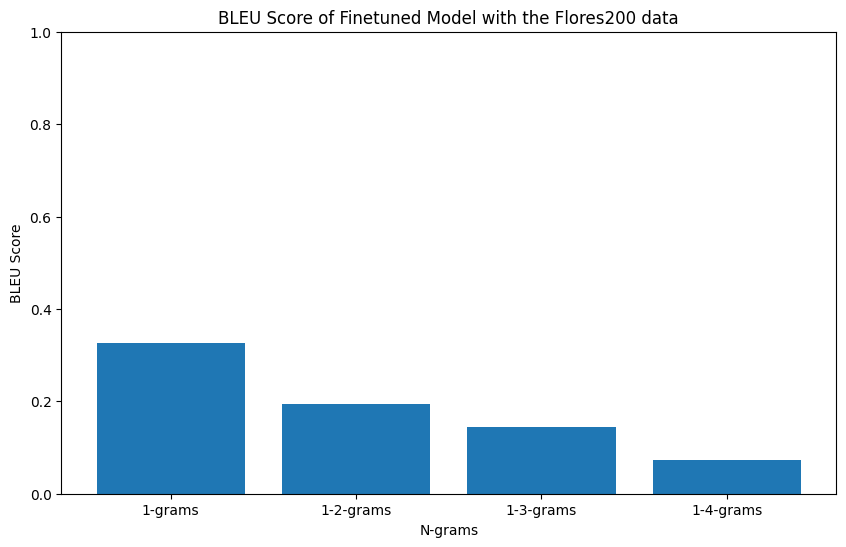

In [117]:
plot_bleu_scores4(bleu_val1_Flores, 'Finetuned')

In [118]:
total_bleu_score(bleu_val1_Flores)

Total BLEU Score:  0.9198226893859117


In [119]:
chrf_val1_1 = chrf_score(tgt5_texts1_Flores, trans5_texts1_Flores)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.8018979153734568


In [120]:
chrf_val1 = chrf_score2(tgt5_texts1_Flores, trans5_texts1_Flores)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.4744002864303616


In [121]:
!pip install sacrebleu evaluate meteor

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 83.1 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 82.6 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 MB 24.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 69.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.8 MB/s eta 0

In [88]:

import nltk
nltk.download('meteor')

[nltk_data] Error loading meteor: Package 'meteor' not found in index


False

In [127]:
import numpy as np
import sacrebleu
import evaluate
from datasets import DatasetDict

metric = evaluate.load("bleu")

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]
    return preds, labels

# Define the compute_metrics function
def compute_metrics(tgt_texts, trans_texts):
    # Assuming labels and predictions are provided as strings
    decoded_preds = tgt_texts
    decoded_labels = trans_texts
    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    result = metric.compute(predictions=decoded_preds, references=[[label] for label in decoded_labels])
#     prediction_lens = [len(pred.split()) for pred in decoded_preds]
    result = {'bleu': result['bleu']}
#     result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result


In [128]:
metrics = compute_metrics(tgt5_texts1_1, trans5_texts1_1)

In [129]:
print(metrics['bleu']*100)

20.64


In [96]:
import nltk
nltk.download('wordnet')
from nltk.translate.meteor_score import meteor_score

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ModuleNotFoundError: No module named 'nltk.translate.meteor_score'

In [122]:
import numpy as np
import evaluate
import torch

# Load evaluation metrics
metric = evaluate.load("sacrebleu")

# Define postprocessing function
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels

# Define compute metrics function
def compute_metrics(decoded_preds, decoded_labels):
    # Post-process the decoded predictions and labels
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    # Compute BLEU score
    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    # Compile results
    result = {'bleu': result['score']}
    result = {k: round(v, 4) for k, v in result.items()}
    return result

2024-06-12 04:52:39.489067: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 04:52:39.489188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 04:52:39.613712: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [123]:
metrics = compute_metrics(tgt5_texts1_1, trans5_texts1_1)

In [124]:
metrics

{'bleu': 20.639}

In [125]:
from collections import Counter
from nltk.util import ngrams
from math import exp, log

def calculate_corpus_bleu(references, candidates, max_n=4):
    assert len(references) == len(candidates), "The number of sentences in references and candidates must be the same."

    p_ns = []
    for n in range(1, max_n + 1):
        p_n = []
        for reference, candidate in zip(references, candidates):
            reference = reference.lower().split()
            candidate = candidate.lower().split()
            if len(candidate) < n or len(reference) < n:  # Check if sentence is long enough for n-grams
                p_n.append(0)
                continue
            reference_ngrams = Counter(ngrams(reference, n))
            candidate_ngrams = Counter(ngrams(candidate, n))

            c = sum(candidate_ngrams.values())
            if c > 0:  # Check to avoid ZeroDivisionError
                for ngram in candidate_ngrams:
                    if ngram in reference_ngrams:
                        candidate_ngrams[ngram] = min(candidate_ngrams[ngram], reference_ngrams[ngram])
                p_n.append(sum(candidate_ngrams.values()) / c)
            else:
                p_n.append(0)
        p_ns.append(p_n)

    bleu_scores = []
    for i in range(len(references)):
        bp = min(1, len(candidates[i].split()) / len(references[i].split()))
        precisions = [p_ns[n][i] for n in range(max_n)]
        
        # Avoid log(0) by replacing 0 precisions with a very small value
        precisions = [p if p > 0 else 1e-9 for p in precisions]
        
        bleu = bp * exp(sum(map(log, precisions)) / max_n)
        bleu_scores.append(bleu)

    return sum(bleu_scores) / len(bleu_scores)

In [126]:
bleu_score = calculate_corpus_bleu(tgt5_texts1_1, trans5_texts1_1)
print(f"BLEU score: {bleu_score}")

BLEU score: 0.9241318763969029


In [ ]:
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]
    return preds, labels

# Define the compute_metrics function
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = preds
    # Assuming labels are provided as strings
    decoded_labels = labels
    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    metric = evaluate.load("bleu")
    meteor = evaluate.load("meteor")
    result = metric.compute(predictions=decoded_preds, references=[[label] for label in decoded_labels])
    meteor_result = meteor.compute(predictions=decoded_preds, references=decoded_labels)
    prediction_lens = [len(pred.split()) for pred in decoded_preds]
    result = {'bleu': result['bleu']}
    result["gen_len"] = np.mean(prediction_lens)
    result["meteor"] = meteor_result["meteor"]
    result = {k: round(v, 4) for k, v in result.items()}
    return result

# Calculate BLEU score for validation data
eval_preds = (val_predictions, val_references)

In [98]:
metrics = compute_metrics(tgt5_texts1_IN22, trans5_texts1_IN22)

In [99]:
metrics

{'bleu': 4.7202}

In [102]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

def nltk_bleu_score(tgt_texts, trans_texts):
    # Tokenize the texts
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_texts2 = [translated_text.split() for translated_text in trans_texts]
    
    # Calculate cumulative 1-4 gram BLEU score
    chencherry = SmoothingFunction()
    bleu_score = corpus_bleu(tgt_texts2, trans_texts2, smoothing_function=chencherry.method2)
    
    return bleu_score

In [104]:
NLTKbleu_val1_IN22 = nltk_bleu_score(tgt5_texts1_IN22, trans5_texts1_IN22)
print("BLEU Score (nltk): ", NLTKbleu_val1_IN22)

BLEU Score (nltk):  0.016928984902788265


In [130]:
from nltk.translate.bleu_score import corpus_bleu

def bleu_scoreNew(tgt_texts, trans_texts):
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_text2 = [translated_text.split() for translated_text in trans_texts]

    bleu_score = corpus_bleu(tgt_texts2, trans_text2, weights=(0.25, 0.25, 0.25, 0.25))
    return bleu_score


In [132]:
NLTK1bleu_val1_IN22 = bleu_scoreNew(tgt5_texts1_1, trans5_texts1_1)
print("BLEU Score (nltk): ", NLTK1bleu_val1_IN22)

BLEU Score (nltk):  0.14693822919126437


In [53]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
FinalModel = MBartForConditionalGeneration.from_pretrained('/kaggle/input/transmodelfinal4')

tokenizer = MBart50TokenizerFast.from_pretrained('/kaggle/input/transmodelfinal4', src_lang="en_XX")

In [54]:
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
FinalModel = FinalModel.to(DEVICE)

In [110]:
def translator1(w):
  text = w
  input_ids = tokenizer(text, return_tensors="pt").input_ids.to(DEVICE)
  translated = FinalModel.generate(input_ids)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)[0]
  return tgt_text

In [10]:
from collections import Counter
import numpy as np

def ngram_counter(sequence, n):
    """Generate n-grams from a given sequence."""
    return Counter([tuple(sequence[i:i+n]) for i in range(len(sequence)-n+1)])

def precision_recall(reference, hypothesis, n):
    """Calculate precision and recall for n-grams."""
    ref_ngrams = ngram_counter(reference, n)
    hyp_ngrams = ngram_counter(hypothesis, n)
    
    overlap = sum((ref_ngrams & hyp_ngrams).values())
    precision = overlap / max(1, sum(hyp_ngrams.values()))
    recall = overlap / max(1, sum(ref_ngrams.values()))
    
    return precision, recall

def f_score(precision, recall, beta=1):
    """Calculate F-score."""
    if precision + recall == 0:
        return 0.0
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

def chrf_plus_plus(reference, hypothesis, beta=2.0, max_char_ngram_order=6, max_word_ngram_order=2):
    """Calculate the ChrF++ score."""
    reference = reference.split()
    hypothesis = hypothesis.split()
    
    char_precisions, char_recalls = [], []
    for n in range(1, max_char_ngram_order + 1):
        char_precision, char_recall = precision_recall("".join(reference), "".join(hypothesis), n)
        char_precisions.append(char_precision)
        char_recalls.append(char_recall)
    
    word_precisions, word_recalls = [], []
    for n in range(1, max_word_ngram_order + 1):
        word_precision, word_recall = precision_recall(reference, hypothesis, n)
        word_precisions.append(word_precision)
        word_recalls.append(word_recall)
    
    char_f_scores = [f_score(p, r, beta) for p, r in zip(char_precisions, char_recalls)]
    word_f_scores = [f_score(p, r, beta) for p, r in zip(word_precisions, word_recalls)]
    
    avg_char_f_score = np.mean(char_f_scores)
    avg_word_f_score = np.mean(word_f_scores)
    
    return (avg_char_f_score + avg_word_f_score) / 2

def corpus_chrf_plus_plus(references, hypotheses, beta=2.0, max_char_ngram_order=6, max_word_ngram_order=2):
    """Calculate the ChrF++ score for a corpus."""
    scores = [chrf_plus_plus(ref, hyp, beta, max_char_ngram_order, max_word_ngram_order) for ref, hyp in zip(references, hypotheses)]
    return np.mean(scores)


In [2]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.chrf_score import corpus_chrf

def translate_texts(translator, dataset):
    tgt_texts, trans_texts = [], []

    for src_text, tgt_text in zip(dataset['src'], dataset['tgt']):
        translated_text = translator(src_text)
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

#for IN22 conv and gen
def translate_texts2(translator, dataset):
    tgt_texts, trans_texts = [], []

    for src_text, tgt_text in zip(dataset['sentence_eng_Latn'], dataset['sentence_mal_Mlym']):
        translated_text = translator(src_text)
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

def bleu_score(tgt_texts, trans_texts):
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_text2 = [translated_text.split() for translated_text in trans_texts]

    bleu_dic = {}
    bleu_dic['1-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(1.0, 0, 0, 0))
    bleu_dic['1-2-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.5, 0.5, 0, 0))
    bleu_dic['1-3-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.3, 0.3, 0.3, 0))
    bleu_dic['1-4-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.25, 0.25, 0.25, 0.25))
    return bleu_dic


def bleu_score2(tgt_texts, trans_texts):
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_text2 = [translated_text.split() for translated_text in trans_texts]

    bleu_dic = {}
    bleu_dic['1-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(1.0, 0, 0, 0))
    bleu_dic['1-2-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.5, 0.5, 0, 0))
    bleu_dic['1-3-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.3, 0.3, 0.3, 0))
    bleu_dic['1-4-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.25, 0.25, 0.25, 0.25))
    
    average_bleu = sum(bleu_dic.values()) / len(bleu_dic)
    bleu_dic['average'] = average_bleu
    
    return bleu_dic

def bleu_score3(tgt_texts, trans_texts):
    # Prepare the target and translated texts for BLEU calculation
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_text2 = [translated_text.split() for translated_text in trans_texts]

    # Calculate BLEU scores for different n-gram weights
    bleu_dic = {}
    bleu_dic['BLEU-1'] = corpus_bleu(tgt_texts2, trans_text2, weights=(1.0, 0, 0, 0))
    bleu_dic['BLEU-2'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.5, 0.5, 0, 0))
    bleu_dic['BLEU-3'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.33, 0.33, 0.34, 0))
    bleu_dic['BLEU-4'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.25, 0.25, 0.25, 0.25))

    # Calculate the average BLEU score as per the paper's formula
    average_bleu = (bleu_dic['BLEU-1'] + bleu_dic['BLEU-2'] + bleu_dic['BLEU-3'] + bleu_dic['BLEU-4']) / 4
    bleu_dic['BLEU_Avg'] = average_bleu * 100  # Multiplying by 100 to match the paper's scaling

    return bleu_dic

def chrf_score(tgt_texts, trans_texts):
    chrf_dic = {}
    chrf_dic['chrf'] = corpus_chrf([list(tgt_texts)], [list(trans_texts)])
    return chrf_dic


import matplotlib.pyplot as plt

def plot_bleu_scores(bleu_val, model_name):
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val.keys(), bleu_val.values())
    plt.title(f"BLEU Score of {model_name} Model with the validation data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()

def plot_bleu_scores2(bleu_val, model_name):
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val.keys(), bleu_val.values())
    plt.title(f"BLEU Score of {model_name} Model with the IN22 data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()

def plot_bleu_scores3(bleu_val, model_name):
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val.keys(), bleu_val.values())
    plt.title(f"BLEU Score of {model_name} Model with the test data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()
    
def plot_bleu_scores4(bleu_val, model_name):
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val.keys(), bleu_val.values())
    plt.title(f"BLEU Score of {model_name} Model with the Flores200 data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()
    
def total_bleu_score(bleu_dic):
    total_bleu = sum(bleu_dic.values())
    print("Total BLEU Score: " , total_bleu)

In [19]:
val_data2 = split_datasets['validation'].select(range(1000)).to_dict()

In [57]:
tgt_texts1, trans_texts1 = translate_texts(translator1, val_data2)

In [58]:
bleu_val1 = bleu_score(tgt_texts1, trans_texts1)
bleu_val1

{'1-grams': 0.15078811549727997,
 '1-2-grams': 0.06826072059666574,
 '1-3-grams': 0.04648900426383561,
 '1-4-grams': 0.015355993968570196}

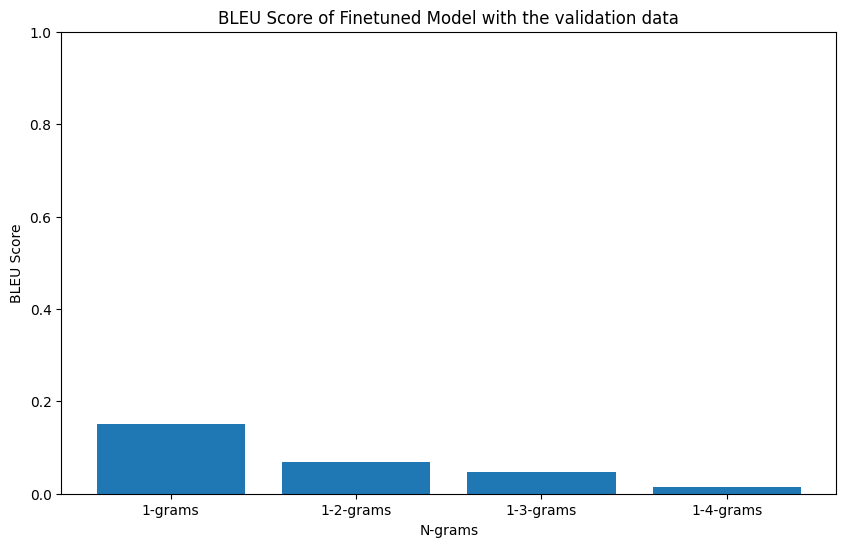

In [59]:
plot_bleu_scores(bleu_val1, 'Finetuned')

In [60]:
total_bleu_score(bleu_val1)

Total BLEU Score:  0.2808938343263515


In [61]:
chrf_val1 = chrf_score(tgt_texts1, trans_texts1)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.6476402899579257


In [28]:
chrf_pp_score1 = corpus_chrf_plus_plus(tgt_texts1, trans_texts1)
print(f"ChrF++ Score: {chrf_pp_score1}")

ChrF++ Score: 0.22508809511681202


In [88]:
chrf_score_output = calculate_chrf(tgt_texts1, trans_texts1)
print("ChrF++ Score Output:", chrf_score_output)

ChrF++ Score Output: start_time:	1716291384
c6+w2-F2	29.3132
c6+w2-avgF2	30.7537
end_time:	1716291385



In [89]:
calculate_chrf_score(tgt_texts1, trans_texts1)

29.3132

In [25]:
chrf_plus_val1=chrf_plus_plus_score(tgt_texts1, trans_texts1)
print("ChrF Score: ", chrf_plus_val1['chrf'])

TypeError: corpus_chrf() got an unexpected keyword argument 'word_order'

In [24]:
val_data3 = split_datasets['test'].select(range(1000)).to_dict()

In [62]:
tgt_texts1_1, trans_texts1_1 = translate_texts(translator1, val_data3)

In [66]:
bleu_val1_1 = bleu_score(tgt_texts1_1, trans_texts1_1)
bleu_val1_1

{'1-grams': 0.15925186036462166,
 '1-2-grams': 0.07996458119317876,
 '1-3-grams': 0.05635728492824943,
 '1-4-grams': 0.021504168145027338}

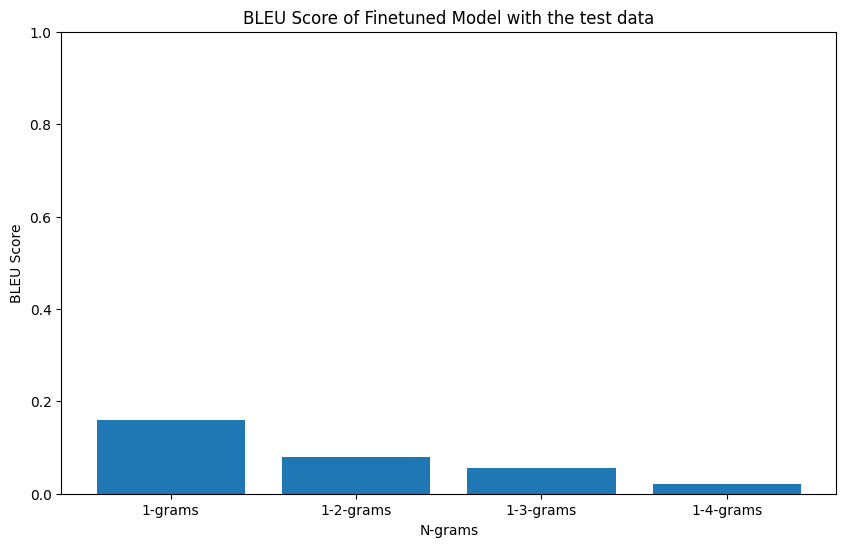

In [67]:
plot_bleu_scores3(bleu_val1_1, 'Finetuned')

In [68]:
total_bleu_score(bleu_val1_1)

Total BLEU Score:  0.31707789463107716


In [69]:
chrf_val1_1 = chrf_score(tgt_texts1_1, trans_texts1_1)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.6445691498707484


In [56]:
chrf_score_output = calculate_chrf(tgt_texts1_1, trans_texts1_1)
print("ChrF++ Score Output:", chrf_score_output)

ChrF++ Score Output: start_time:	1716288096
c6+w2-F2	29.9715
c6+w2-avgF2	31.0679
end_time:	1716288097



In [90]:
calculate_chrf_score(tgt_texts1_1, trans_texts1_1)

29.9715

In [112]:
tgt_texts1_IN22, trans_texts1_IN22 = translate_texts2(translator1, d3['gen'])

In [82]:
for i, (text1, text2, text3) in enumerate(zip(trans_texts1_IN22[0:11],tgt_texts1_IN22[0:11], d3['gen']['sentence_eng_Latn']), 1):
    print(f"{i}: {text3},\n tgt: {text2},\n trans : {text1}")


1: An appearance is a bunch of attributes related to the service person, like their shoes, clothes, tie, jewellery, hairstyle, make-up, watch, cosmetics, perfume, etc.,
 tgt: ബാഹ്യരൂപം എന്നുള്ളത് ഷൂസ്, വസ്ത്രങ്ങള്‍, ടൈ, ആഭരണങ്ങള്‍, ഹെയര്‍ സ്റ്റൈല്‍, മേക്കപ്പ്, വാച്ച്, സൗന്ദര്യവര്‍ദ്ധകസാമഗ്രികൾ, സുഗന്ധലേപനങ്ങള്‍ തുടങ്ങി സേവനം നല്കുന്നയാളിന്‍റെ ഒരുകൂട്ടം ഗുണവിശേഷങ്ങളുമായി ബന്ധപ്പെട്ടതാണ്.,
 trans : അവരുടെ ഷൂസ്, വസ്ത്രം, ടൈ, ആഭരണം, ഹെയര് സ്റ്റൈല്, മേക്കപ്പ്, വാച്ച്, സൗന്ദര്യസാധനങ്ങള്, സുഗന്ധദ്രവ്യം എന്നിവ പോലുള്ള സർവീസ് വ്യക്തിയുമായുള്ള ബന്ധമുള്ള ഒരു കൂട്ടമാണ് രൂപം.
2: Ajanta, located in the Aurangabad District of Maharashtra has twenty-nine caitya and vihara caves decorated with sculptures and paintings from the first century B.C.E. to the fifth century C.E.,
 tgt: മഹാരാഷ്ട്രയിലെ ഔറംഗാബാദ് ജില്ലയിൽ സ്ഥിതിചെയ്യുന്ന അജന്തയിൽ ബി. സി. ഇ ഒന്നാം നൂറ്റാണ്ട് മുതൽ സി. ഇ അഞ്ചാം നൂറ്റാണ്ട് വരെയുള്ള കാലഘട്ടത്തിലെ, പ്രതിമകളാലും ചിത്രങ്ങളാലും അലങ്കരിക്കപ്പെട്ട 29 ചൈത്യഗുഹകളും വിഹാരഗുഹകളും ഉണ്ട്.,
 tra

In [113]:
bleu_val1_IN22 = bleu_score(tgt_texts1_IN22, trans_texts1_IN22)
bleu_val1_IN22

{'1-grams': 0.140448481407891,
 '1-2-grams': 0.06088636351583571,
 '1-3-grams': 0.040004752548955476,
 '1-4-grams': 0.013636792648259396}

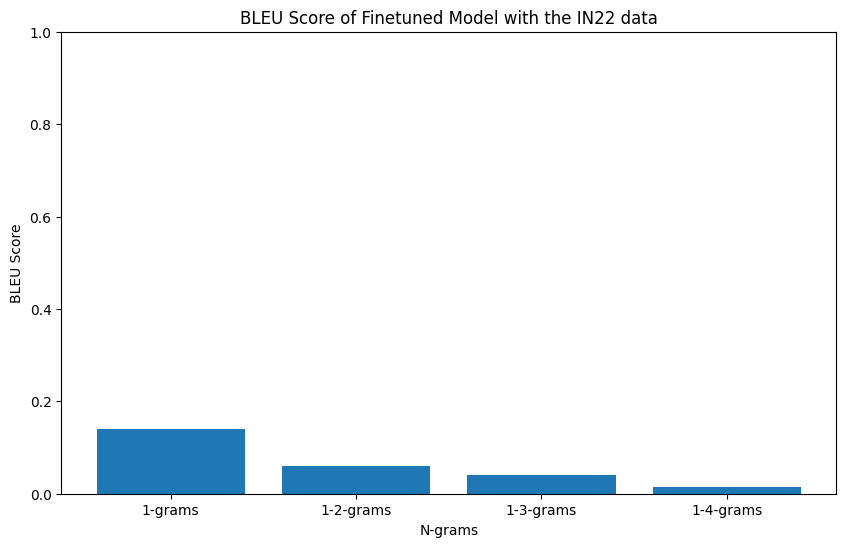

In [114]:
plot_bleu_scores2(bleu_val1_IN22, 'Finetuned')

In [115]:
total_bleu_score(bleu_val1_IN22)

Total BLEU Score:  0.2549763901209416


In [116]:
chrf_val1_1 = chrf_score(tgt_texts1_IN22, trans_texts1_IN22)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.6080662053254597


In [169]:
tgt_texts1_Flores, trans_texts1_Flores = translate_texts2(translator1, d5['dev'])

In [200]:
bleu_val_Flores = bleu_score2(tgt_texts1_Flores, trans_texts1_Flores)
bleu_val_Flores

{'1-grams': 0.15276669326948655,
 '1-2-grams': 0.0634861878142873,
 '1-3-grams': 0.03971541093763602,
 '1-4-grams': 0.013380725183670514,
 'average': 0.06733725430127009}

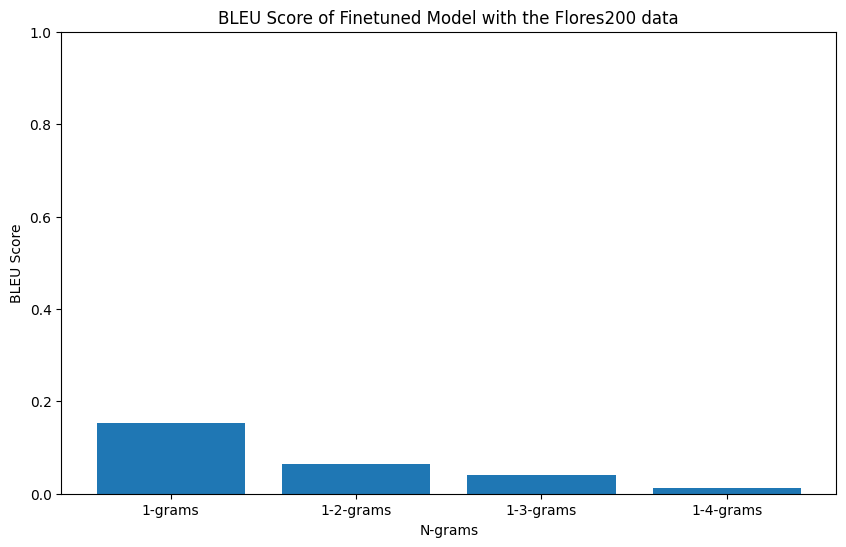

In [199]:
plot_bleu_scores4(bleu_val_Flores, 'Finetuned')

In [174]:
total_bleu_score(bleu_val_Flores)

Total BLEU Score:  0.3918065617490458


In [175]:
chrf_val1_1 = chrf_score(tgt_texts1_Flores, trans_texts1_Flores)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.6536574841596074


In [ ]:
# chrf score and graph from torchmetrics

from torchmetrics.text import CHRFScore
import matplotlib.pyplot as plt
def chrf_score_and_plot(tgt5_texts1_1, trans5_texts1_1, target_lang="ml_IN"):
    metric = CHRFScore()
#     tgt_texts ,trans_text = [], []

#     for src_text, tgt_text in zip(dataset['src'], dataset['tgt']):
#         translated_text = translator1(src_text)
#         tgt_texts.append([tgt_text])
#         trans_text.append(translated_text)

    # Update the metric with the predictions and targets
    metric.update(tgt5_texts1_1, trans5_texts1_1)

    # Compute the final ChrF score
    final_chrf_score = metric.compute()

    # Plot the ChrF score
    fig_, ax_ = metric.plot()
    plt.title("ChrF Score with the validation data")
    plt.show()

    print("ChrF Score: ", final_chrf_score)


In [139]:
from torchmetrics.text import CHRFScore
import matplotlib.pyplot as plt

def chrf_score_and_plot1(tgt_texts, trans_texts):
    metric = CHRFScore()

    # Update the metric with the predictions and targets
    metric.update(trans_texts, tgt_texts)

    # Compute the final ChrF score
    final_chrf_score = metric.compute()

    # Plot the ChrF score
    fig_, ax_ = metric.plot()
    plt.title("ChrF Score with the validation data")
    plt.show()

    print("ChrF Score: ", final_chrf_score)
    

def chrf_score_and_plot2(tgt_texts, trans_texts):
    metric = CHRFScore()

    # Update the metric with the predictions and targets
    metric.update(trans_texts, tgt_texts)

    # Compute the final ChrF score
    final_chrf_score = metric.compute()

    # Plot the ChrF score
    fig_, ax_ = metric.plot()
    plt.title("ChrF Score with the test data")
    plt.show()

    print("ChrF Score: ", final_chrf_score)
    
    
def chrf_score_and_plot3(tgt_texts, trans_texts):
    metric = CHRFScore()

    # Update the metric with the predictions and targets
    metric.update(trans_texts, tgt_texts)

    # Compute the final ChrF score
    final_chrf_score = metric.compute()

    # Plot the ChrF score
    fig_, ax_ = metric.plot()
    plt.title("ChrF Score with the flores200 devtest")
    plt.show()

    print("ChrF Score: ", final_chrf_score)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


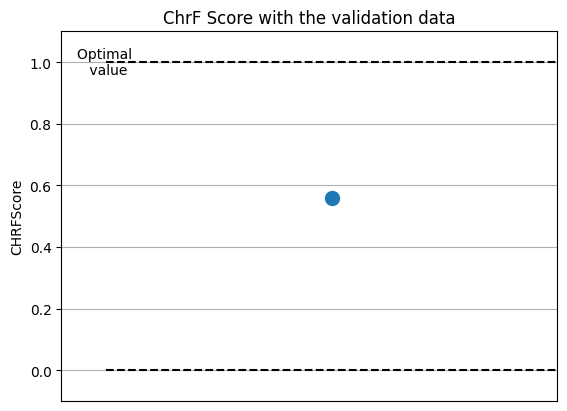

ChrF Score:  tensor(0.5581)


In [142]:
chrf_score_and_plot(tgt11_texts1, trans11_texts1)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


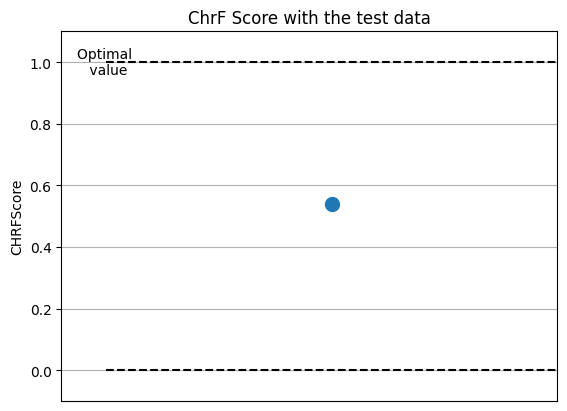

ChrF Score:  tensor(0.5395)


In [143]:
chrf_score_and_plot2(tgt5_texts1_1, trans5_texts1_1)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


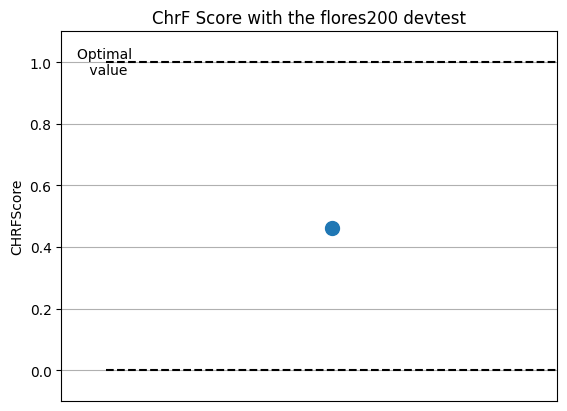

ChrF Score:  tensor(0.4604)


In [141]:
chrf_score_and_plot3(tgt5_texts1_Flores, trans5_texts1_Flores)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


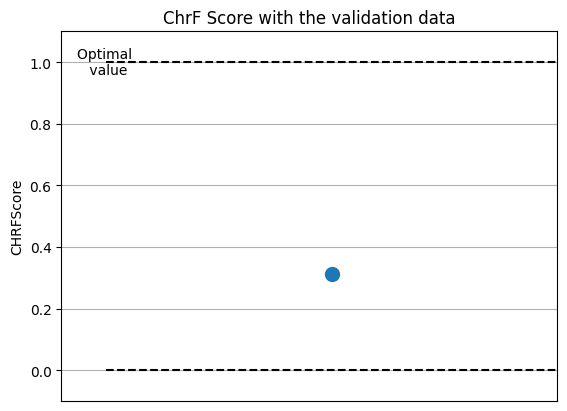

ChrF Score:  tensor(0.3130)


In [144]:
chrf_score_and_plot(tgt_texts1, trans_texts1)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


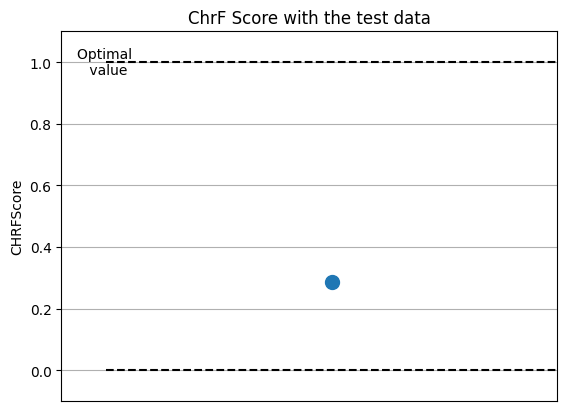

ChrF Score:  tensor(0.2853)


In [145]:
chrf_score_and_plot2(tgt_texts1_1, trans_texts1_1)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


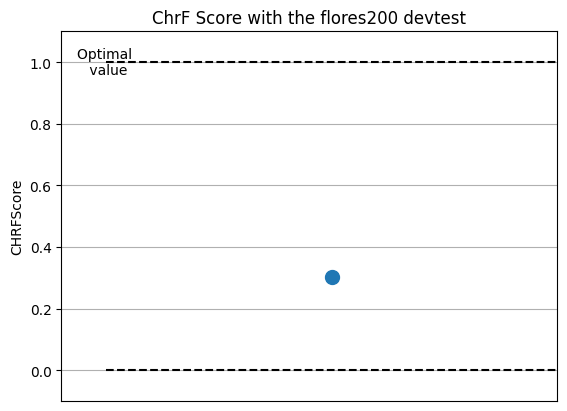

ChrF Score:  tensor(0.3012)


In [147]:
chrf_score_and_plot3(tgt_texts1_Flores, trans_texts1_Flores)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


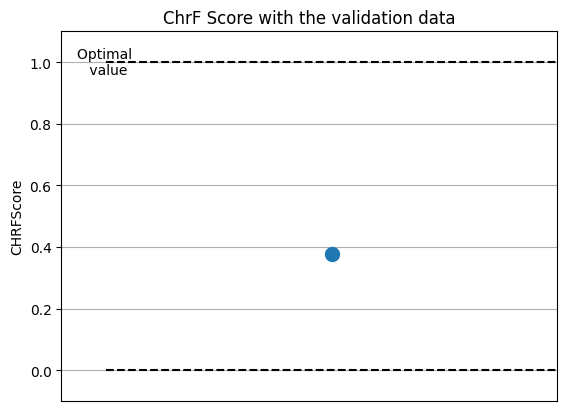

ChrF Score:  tensor(0.3786)


In [148]:
chrf_score_and_plot(tgt_texts2, trans_texts2)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


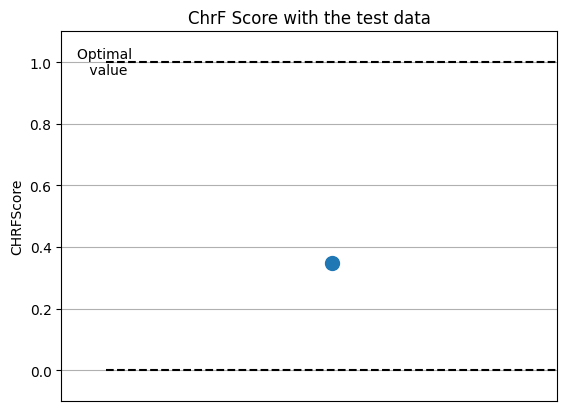

ChrF Score:  tensor(0.3485)


In [149]:
chrf_score_and_plot2(tgt_texts2_1, trans_texts2_1)

/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/opt/conda/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:219: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


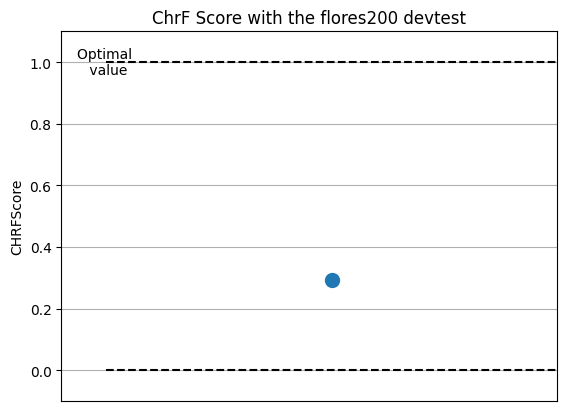

ChrF Score:  tensor(0.2926)


In [150]:
chrf_score_and_plot3(tgt_texts2_Flores, trans_texts2_Flores)

**mbart**

In [43]:
tgt_texts1, trans_texts1 = translate_texts(translator1, FltDataVld)

In [47]:
bleu_val1 = bleu_score2(tgt_texts1, trans_texts1)
bleu_val1

{'1-grams': 0.15818072046689477,
 '1-2-grams': 0.07560627831713079,
 '1-3-grams': 0.055943529198304046,
 '1-4-grams': 0.025065703467855038,
 'average': 0.07869905786254616}

In [46]:
bleu_val1 = bleu_score3(tgt_texts1, trans_texts1)
bleu_val1

{'BLEU-1': 0.15818072046689477,
 'BLEU-2': 0.07560627831713079,
 'BLEU-3': 0.040106246420699626,
 'BLEU-4': 0.025065703467855038,
 'BLEU_Avg': 7.4739737168145055}

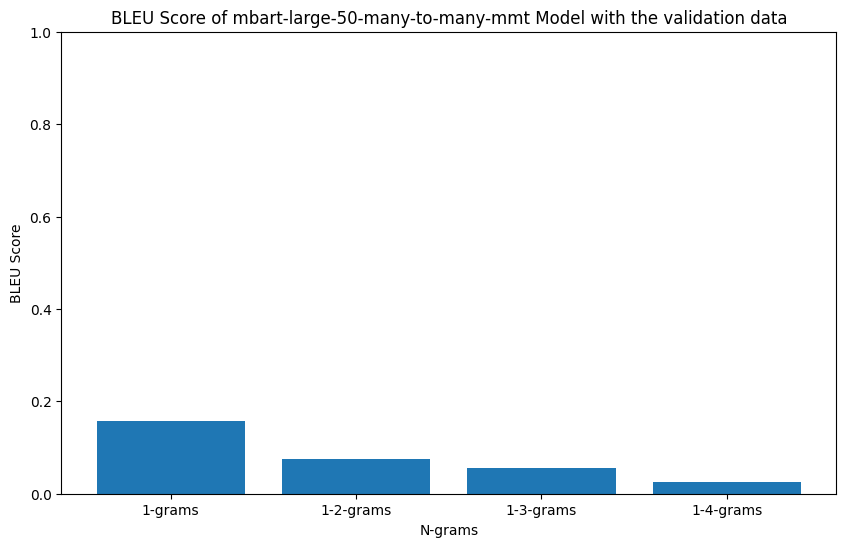

In [48]:
plot_bleu_scores(bleu_val1, 'mbart-large-50-many-to-many-mmt')

In [49]:
total_bleu_score(bleu_val1)

Total BLEU Score:  0.3934952893127308


In [50]:
chrf_val2 = chrf_score(tgt_texts1, trans_texts1)
print("ChrF Score: ", chrf_val2['chrf'])

ChrF Score:  0.5545461778229861


In [53]:
tgt_texts1_1, trans_texts1_1 = translate_texts(translator1, FltDataTst)

In [60]:
bleu_val1_1 = bleu_score2(tgt_texts1_1, trans_texts1_1)
bleu_val1_1

{'1-grams': 0.16076931250664117,
 '1-2-grams': 0.07833038786382723,
 '1-3-grams': 0.05795018268577218,
 '1-4-grams': 0.02548210043635141,
 'average': 0.080632995873148}

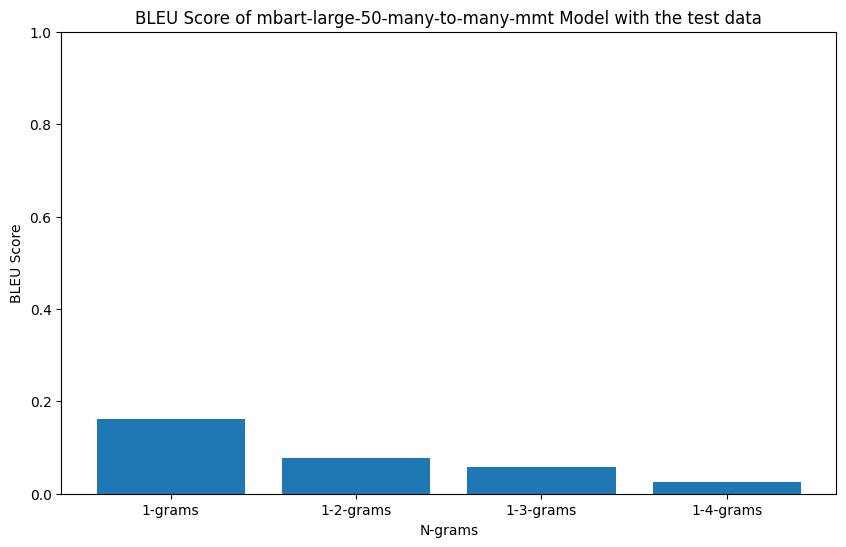

In [61]:
plot_bleu_scores3(bleu_val1_1, 'mbart-large-50-many-to-many-mmt')

In [62]:
total_bleu_score(bleu_val1_1)

Total BLEU Score:  0.40316497936574


In [63]:
chrf_val2 = chrf_score(tgt_texts1_1, trans_texts1_1)
print("ChrF Score: ", chrf_val2['chrf'])

ChrF Score:  0.5550926589346881


In [64]:
chrf_val1 = chrf_score2(tgt_texts1_1, trans_texts1_1)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.33881707794751276


In [109]:
calculate_chrf_score(tgt_texts1_1, trans_texts1_1)

23.6601

In [65]:
tgt_texts1_IN22, trans_texts1_IN22 = translate_texts(translator2, d3['gen'])

In [ ]:
bleu_val2_IN22 = bleu_score(tgt_texts2_IN22, trans_texts2_IN22)
bleu_val2_IN22

In [ ]:
plot_bleu_scores2(bleu_val2_IN22, 'Finetuned')

In [68]:
total_bleu_score(bleu_val2_IN22)

Total BLEU Score:  0.16344838733311445


In [69]:
chrf_val1_1 = chrf_score(tgt_texts2_IN22, trans_texts2_IN22)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.5248828756616316


In [54]:
tgt_texts1_Flores, trans_texts1_Flores = translate_texts2(translator1, d2['devtest'])

In [55]:
bleu_val1_Flores = bleu_score2(tgt_texts1_Flores, trans_texts1_Flores)
bleu_val1_Flores

{'1-grams': 0.15276669326948655,
 '1-2-grams': 0.0634861878142873,
 '1-3-grams': 0.03971541093763602,
 '1-4-grams': 0.013380725183670514,
 'average': 0.06733725430127009}

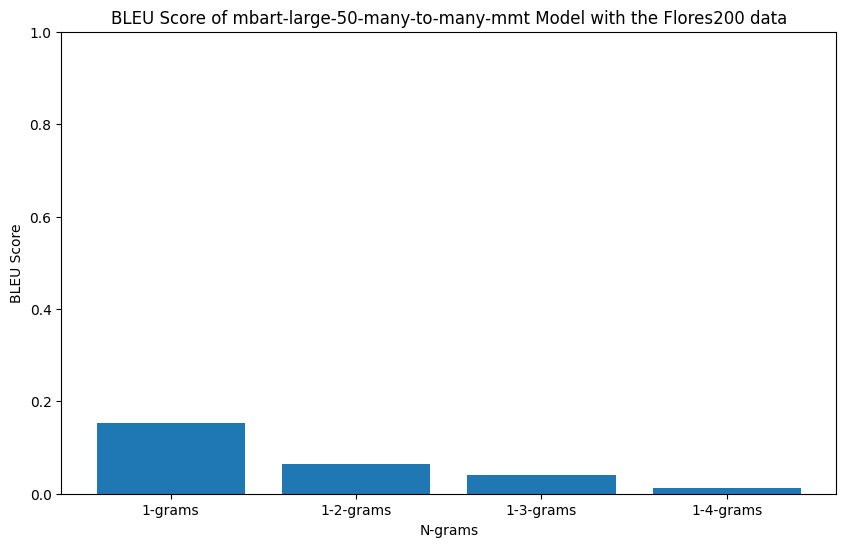

In [57]:
plot_bleu_scores4(bleu_val1_Flores, 'mbart-large-50-many-to-many-mmt')

In [56]:
total_bleu_score(bleu_val1_Flores)

Total BLEU Score:  0.33668627150635044


In [58]:
chrf_val1_1 = chrf_score(tgt_texts1_Flores, trans_texts1_Flores)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.6014690644603728


In [59]:
chrf_val1 = chrf_score2(tgt_texts1_Flores, trans_texts1_Flores)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.5516621743036838


**Helsinki-NLP/opus-mt-en-ml**

In [17]:
tgt_texts2, trans_texts2 = translate_texts(translator2, FltDataVld)

In [18]:
bleu_val2 = bleu_score2(tgt_texts2, trans_texts2)
bleu_val2

{'1-grams': 0.23552789826175927,
 '1-2-grams': 0.1341415166776486,
 '1-3-grams': 0.10560608386355261,
 '1-4-grams': 0.054709196950588714,
 'average': 0.1324961739383873}

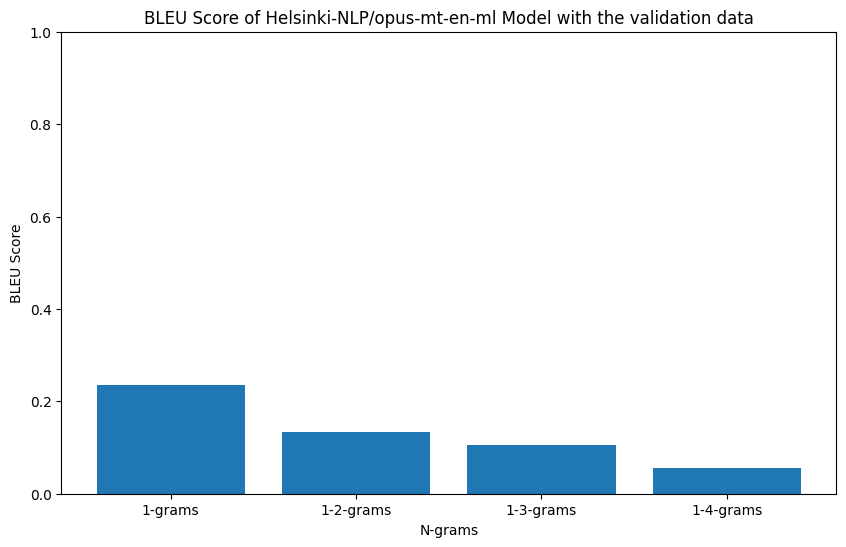

In [19]:
plot_bleu_scores(bleu_val2, 'Helsinki-NLP/opus-mt-en-ml')

In [20]:
total_bleu_score(bleu_val2)

Total BLEU Score:  0.6624808696919365


In [21]:
chrf_val2 = chrf_score(tgt_texts2, trans_texts2)
print("ChrF Score: ", chrf_val2['chrf'])

ChrF Score:  0.6408402499935794


In [22]:
chrf_val1 = chrf_score2(tgt_texts2, trans_texts2)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.4157043879907621


In [74]:
chrf_score_output = calculate_chrf(tgt_texts3, trans_texts3)
print("ChrF++ Score Output:", chrf_score_output)

ChrF++ Score Output: start_time:	1716289961
c6+w2-F2	30.3180
c6+w2-avgF2	28.9965
end_time:	1716289962



In [111]:
calculate_chrf_score(tgt_texts3, trans_texts3)

30.318

In [46]:
print(translator3('hello'))

ഹലോ


In [23]:
tgt_texts2_1, trans_texts2_1 = translate_texts(translator2, FltDataTst)

In [25]:
bleu_val2_1 = bleu_score2(tgt_texts2_1, trans_texts2_1)
bleu_val2_1

{'1-grams': 0.23106303698568117,
 '1-2-grams': 0.13090925046974186,
 '1-3-grams': 0.10389627021927601,
 '1-4-grams': 0.05514498929114688,
 'average': 0.13025338674146147}

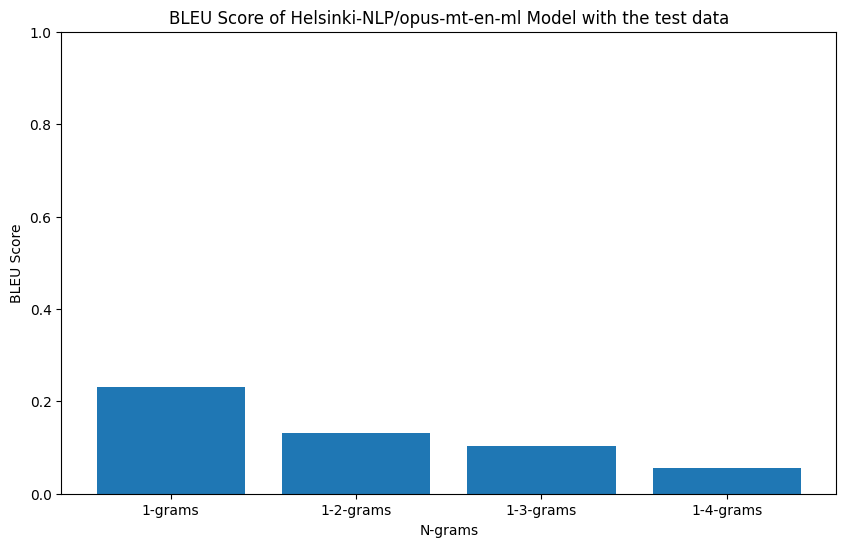

In [26]:
plot_bleu_scores3(bleu_val2_1, 'Helsinki-NLP/opus-mt-en-ml')

In [27]:
total_bleu_score(bleu_val2_1)

Total BLEU Score:  0.6512669337073074


In [28]:
chrf_val3_3 = chrf_score(tgt_texts2_1, trans_texts2_1)
print("ChrF Score: ", chrf_val3_3['chrf'])

ChrF Score:  0.6424949469740384


In [29]:
chrf_val1 = chrf_score2(tgt_texts2_1, trans_texts2_1)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.9229898074745185


In [113]:
chrf_score_output = calculate_chrf(tgt_texts3_3, trans_texts3_3)
print("ChrF++ Score Output:", chrf_score_output)

ChrF++ Score Output: start_time:	1716293388
c6+w2-F2	29.1498
c6+w2-avgF2	29.3515
end_time:	1716293389



In [114]:
calculate_chrf_score(tgt_texts3_3, trans_texts3_3)

29.1498

In [122]:
tgt_texts3_IN22, trans_texts3_IN22 = translate_texts2(translator3, d3['gen'])

In [150]:
bleu_val3_IN22 = bleu_score(tgt_texts3_IN22, trans_texts3_IN22)
bleu_val3_IN22

{'1-grams': 0.12193541757806806,
 '1-2-grams': 0.0503087837297713,
 '1-3-grams': 0.030889385839576372,
 '1-4-grams': 0.010297863923746379}

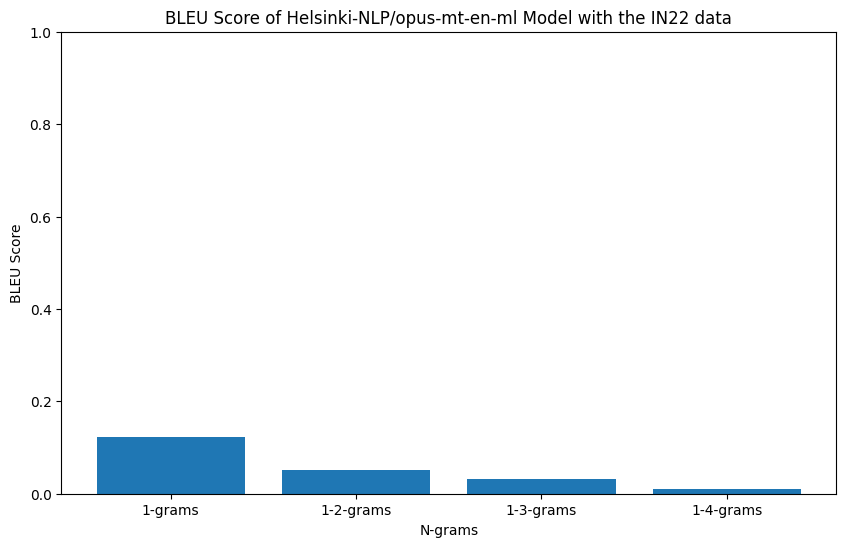

In [197]:
plot_bleu_scores2(bleu_val3_IN22, 'Helsinki-NLP/opus-mt-en-ml')

In [152]:
total_bleu_score(bleu_val3_IN22)

Total BLEU Score:  0.2134314510711621


In [154]:
chrf_val3IN22 = chrf_score(tgt_texts3_IN22, trans_texts3_IN22)
print("ChrF Score: ", chrf_val3IN22['chrf'])

ChrF Score:  0.5357456256059825


In [30]:
tgt_texts2_Flores, trans_texts2_Flores = translate_texts2(translator2, d2['devtest'])

In [34]:
bleu_val2_Flores = bleu_score2(tgt_texts2_Flores, trans_texts2_Flores)
bleu_val2_Flores

{'1-grams': 0.1597461800045906,
 '1-2-grams': 0.08406558488904226,
 '1-3-grams': 0.058789606311707,
 '1-4-grams': 0.02424265366662931,
 'average': 0.0817110062179923}

In [33]:
bleu_val2_Flores = bleu_score3(tgt_texts2_Flores, trans_texts2_Flores)
bleu_val2_Flores

{'BLEU-1': 0.1597461800045906,
 'BLEU-2': 0.08406558488904226,
 'BLEU-3': 0.044183585074820377,
 'BLEU-4': 0.02424265366662931,
 'BLEU_Avg': 7.805950090877063}

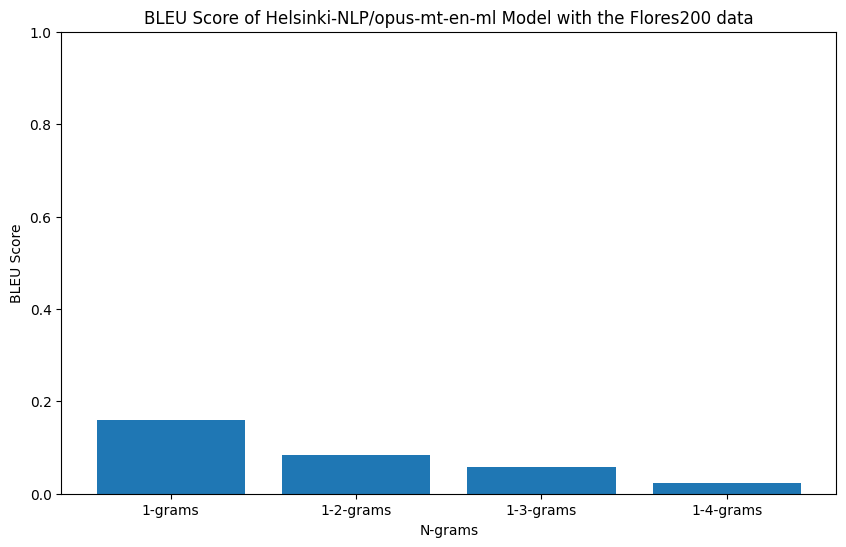

In [35]:
plot_bleu_scores4(bleu_val2_Flores, 'Helsinki-NLP/opus-mt-en-ml')

In [36]:
total_bleu_score(bleu_val2_Flores)

Total BLEU Score:  0.4085550310899615


In [37]:
chrf_val1_1 = chrf_score(tgt_texts2_Flores, trans_texts2_Flores)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.5776549849231974


In [38]:
chrf_val1 = chrf_score2(tgt_texts2_Flores, trans_texts2_Flores)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.3634504554749954


**indictrans2**

In [54]:
# import sys
# sys.path.append('/kaggle/input/indictokenizer/IndicTransTokenizer-main')

In [122]:
tgt_texts3, trans_texts3 = translate_texts(translator3, FltDataVld)

In [64]:
bleu_val3 = bleu_score2(tgt_texts3, trans_texts3)
bleu_val3

{'1-grams': 0.2363565310950925,
 '1-2-grams': 0.13336410955777428,
 '1-3-grams': 0.10490376014684195,
 '1-4-grams': 0.05283909572755741}

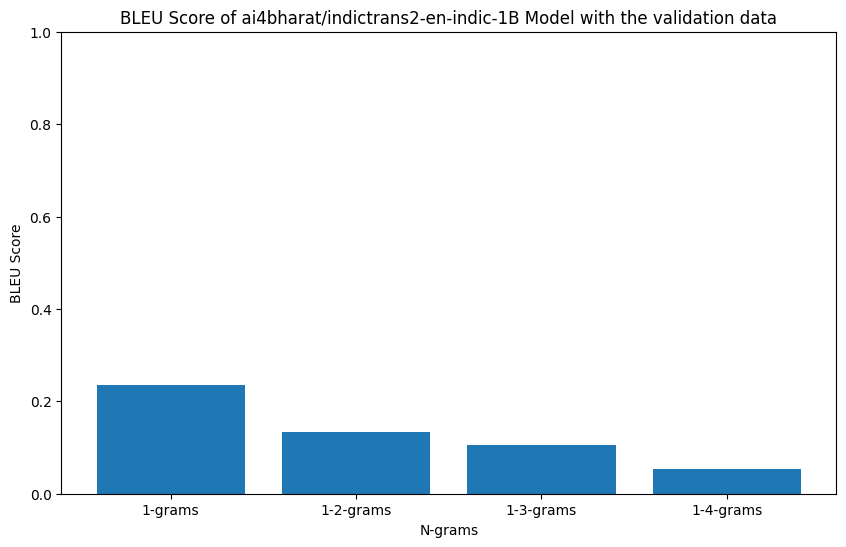

In [65]:
plot_bleu_scores(bleu_val3, 'ai4bharat/indictrans2-en-indic-1B')

In [66]:
total_bleu_score(bleu_val3)

Total BLEU Score:  0.5274634965272662


In [67]:
chrf_val3 = chrf_score(tgt_texts3, trans_texts3)
print("ChrF Score: ", chrf_val3['chrf'])

ChrF Score:  0.682142443805103


In [175]:
chrf_val1 = chrf_score2(tgt_texts3, trans_texts3)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.681818181818182


In [115]:
chrf_score_output = calculate_chrf(tgt_texts4, trans_texts4)
print("ChrF++ Score Output:", chrf_score_output)

ChrF++ Score Output: start_time:	1716293421
c6+w2-F2	36.8655
c6+w2-avgF2	37.0368
end_time:	1716293422



In [116]:
calculate_chrf_score(tgt_texts4, trans_texts4)

36.8655

In [131]:
print(translator4("Hello, how are you?"))

ഹലോ, എങ്ങനെയുണ്ട്? 


In [123]:
tgt_texts3_1, trans_texts3_1 = translate_texts(translator3, FltDataTst)

In [176]:
bleu_val3_1 = bleu_score2(tgt_texts3_1, trans_texts3_1)
bleu_val3_1

{'1-grams': 0.41204298462449196,
 '1-2-grams': 0.28468238721202,
 '1-3-grams': 0.2388481843462353,
 '1-4-grams': 0.15244287757814085,
 'average': 0.27200410844022205}

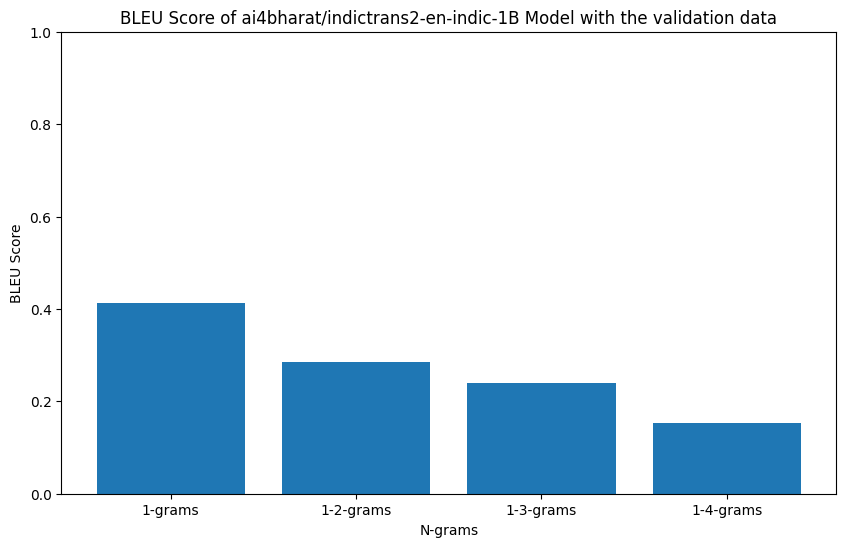

In [177]:
plot_bleu_scores(bleu_val3_1, 'ai4bharat/indictrans2-en-indic-1B')

In [178]:
total_bleu_score(bleu_val3_1)

Total BLEU Score:  1.3600205422011102


In [179]:
chrf_val3_1 = chrf_score(tgt_texts3_1, trans_texts3_1)
print("ChrF Score: ", chrf_val3_1['chrf'])

ChrF Score:  0.7452943806666882


In [180]:
chrf_val1 = chrf_score2(tgt_texts3_1, trans_texts3_1)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.6720122184039711


In [119]:
chrf_score_output = calculate_chrf(tgt_texts4_4, trans_texts4_4)
print("ChrF++ Score Output:", chrf_score_output)

ChrF++ Score Output: start_time:	1716293929
c6+w2-F2	36.6736
c6+w2-avgF2	37.3139
end_time:	1716293930



In [120]:
calculate_chrf_score(tgt_texts4_4, trans_texts4_4)

36.6736

In [135]:
tgt_texts4_IN22, trans_texts4_IN22 = translate_texts2(translator4, d3['gen'])

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3935: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [136]:
bleu_val4_IN22 = bleu_score(tgt_texts4_IN22, trans_texts4_IN22)
bleu_val4_IN22

{'1-grams': 0.30151856342744965,
 '1-2-grams': 0.17678469761656854,
 '1-3-grams': 0.13726894824056735,
 '1-4-grams': 0.07268055324432832}

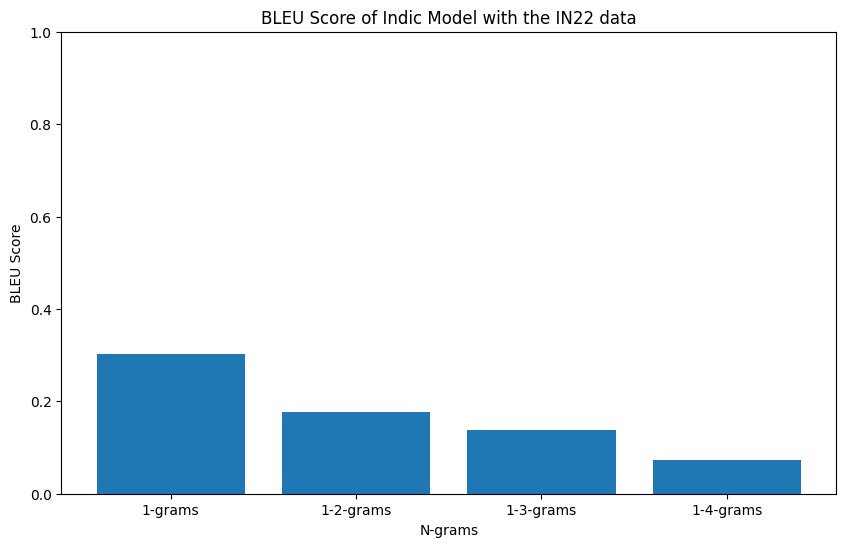

In [195]:
plot_bleu_scores2(bleu_val4_IN22, 'Indic')

In [138]:
total_bleu_score(bleu_val4_IN22)

Total BLEU Score:  0.6882527625289139


In [139]:
chrf_val1_1 = chrf_score(tgt_texts4_IN22, trans_texts4_IN22)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.7309733165681869


In [124]:
tgt_texts3_Flores, trans_texts3_Flores = translate_texts2(translator3, d2['devtest'])

In [181]:
bleu_val3_Flores = bleu_score2(tgt_texts3_Flores, trans_texts3_Flores)
bleu_val3_Flores

{'1-grams': 0.45166607255072894,
 '1-2-grams': 0.3151099407573412,
 '1-3-grams': 0.25880316972248607,
 '1-4-grams': 0.1610105662999253,
 'average': 0.29664743733262033}

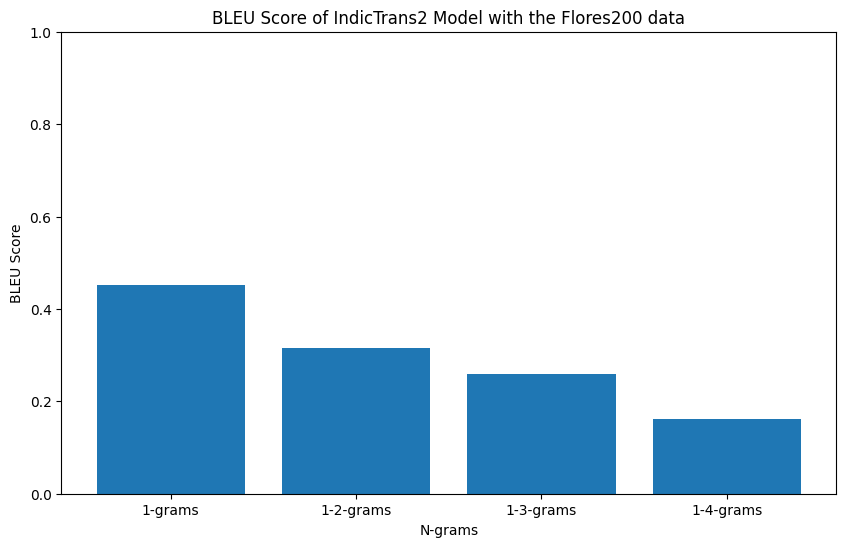

In [182]:
plot_bleu_scores4(bleu_val3_Flores, 'IndicTrans2')

In [183]:
total_bleu_score(bleu_val3_Flores)

Total BLEU Score:  1.4832371866631018


In [184]:
chrf_val1_1 = chrf_score(tgt_texts3_Flores, trans_texts3_Flores)
print("ChrF Score: ", chrf_val1_1['chrf'])

ChrF Score:  0.8290971072341811


In [185]:
chrf_val1 = chrf_score2(tgt_texts3_Flores, trans_texts3_Flores)
print("ChrF Score: ", chrf_val1['chrf'])

ChrF Score:  0.6298862828713575


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.chrf_score import corpus_chrf
import matplotlib.pyplot as plt
import subprocess

def translate_texts(translator, dataset):
    tgt_texts, trans_texts = [], []

    for src_text, tgt_text in zip(dataset['src'], dataset['tgt']):
        translated_text = translator(src_text)
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

def bleu_score(tgt_texts, trans_texts):
    tgt_texts2 = [[tgt_text.split()] for tgt_text in tgt_texts]
    trans_text2 = [translated_text.split() for translated_text in trans_texts]

    bleu_dic = {}
    bleu_dic['1-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(1.0, 0, 0, 0))
    bleu_dic['1-2-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.5, 0.5, 0, 0))
    bleu_dic['1-3-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.3, 0.3, 0.3, 0))
    bleu_dic['1-4-grams'] = corpus_bleu(tgt_texts2, trans_text2, weights=(0.25, 0.25, 0.25, 0.25))
    return bleu_dic

def chrf_score(tgt_texts, trans_texts):
    chrf_dic = {}
    chrf_dic['chrf'] = corpus_chrf([list(tgt_texts)], [list(trans_texts)])
    return chrf_dic



def plot_bleu_scores(bleu_val, model_name):
    plt.figure(figsize=(10, 6))
    plt.bar(bleu_val.keys(), bleu_val.values())
    plt.title(f"BLEU Score of {model_name} Model with the validation data")
    plt.ylim((0, 1))
    plt.xlabel('N-grams')
    plt.ylabel('BLEU Score')
    plt.show()
    
def total_bleu_score(bleu_dic):
    total_bleu = sum(bleu_dic.values())
    print("Total BLEU Score: " , total_bleu)

# Example usage with your translation data
tgt_texts1, trans_texts1 = translate_texts(translator1, val_data2)

# Calculate BLEU and ChrF scores
bleu_scores = bleu_score(tgt_texts1, trans_texts1)
chrf_scores = chrf_score(tgt_texts1, trans_texts1)

# Save texts to files for ChrF++ calculation


# Plot BLEU scores
plot_bleu_scores(bleu_scores, "Your Model")
total_bleu_score(bleu_scores)


In [68]:
%cd /kaggle/input/chrf-plus-plus/chrF-master

/kaggle/input/chrf-plus-plus/chrF-master


In [43]:
import subprocess

def write_to_file(filename, lines):
    with open(filename, "w", encoding="utf-8") as file:
        for line in lines:
            file.write(line + "\n")

def run_chrf_pp(reference_file, hypothesis_file):
    result = subprocess.run(
        ["python", "chrF++.py", "-R", reference_file, "-H", hypothesis_file, "-nc", "6", "-nw", "2", "-b", "2.0"],
        capture_output=True, text=True
    )
    return result.stdout

In [45]:
writable_dir = "/kaggle/working/"

# Write reference and hypothesis texts to files in the writable directory
write_to_file(writable_dir + "reference1.txt", tgt_texts6)
write_to_file(writable_dir + "hypothesis1.txt", google_trans)

# Run chrF++.py and capture the output
chrf_pp_output = run_chrf_pp(writable_dir + "reference1.txt", writable_dir + "hypothesis1.txt")
print("ChrF++ Score Output:")

ChrF++ Score Output:


In [50]:
import subprocess

def calculate_chrf(reference_texts, hypothesis_texts):
    def write_to_file(filename, lines):
        with open(filename, "w", encoding="utf-8") as file:
            for line in lines:
                file.write(line + "\n")

    def run_chrf_pp(reference_file, hypothesis_file):
        result = subprocess.run(
            ["python", "chrF++.py", "-R", reference_file, "-H", hypothesis_file, "-nc", "6", "-nw", "2", "-b", "2.0"],
            capture_output=True, text=True
        )
        if result.returncode != 0:
            print(f"Error running chrF++.py: {result.stderr}")
        return result.stdout

    # Change to a writable directory
    writable_dir = "/kaggle/working/"

    # Write reference and hypothesis texts to files in the writable directory
    write_to_file(writable_dir + "reference.txt", reference_texts)
    write_to_file(writable_dir + "hypothesis.txt", hypothesis_texts)

    # Run chrF++.py and capture the output
    chrf_pp_output = run_chrf_pp(writable_dir + "reference.txt", writable_dir + "hypothesis.txt")
    return chrf_pp_output


In [51]:
chrf_score_output = calculate_chrf(tgt_texts6, google_trans)
print("ChrF++ Score Output:", chrf_score_output)

ChrF++ Score Output: start_time:	1716287633
c6+w2-F2	36.2478
c6+w2-avgF2	36.5556
end_time:	1716287634



In [49]:
#separate chrf++
%cd /kaggle/input/chrf-plus-plus/chrF-master

import subprocess

def write_to_file(filename, lines):
    with open(filename, "w", encoding="utf-8") as file:
        for line in lines:
            file.write(line + "\n")

def run_chrf_pp(reference_file, hypothesis_file):
    result = subprocess.run(
        ["python", "chrF++.py", "-R", reference_file, "-H", hypothesis_file, "-nc", "6", "-nw", "2", "-b", "2.0"],
        capture_output=True, text=True
    )
    if result.returncode != 0:
        print(f"Error running chrF++.py: {result.stderr}")
    return result.stdout

# Change to a writable directory
writable_dir = "/kaggle/working/"

# Write reference and hypothesis texts to files in the writable directory
write_to_file(writable_dir + "reference.txt", tgt_texts6)
write_to_file(writable_dir + "hypothesis.txt", google_trans)

# Run chrF++.py and capture the output
chrf_pp_output = run_chrf_pp(writable_dir + "reference.txt", writable_dir + "hypothesis.txt")
print("ChrF++ Score Output:")
print(chrf_pp_output)


/kaggle/input/chrf-plus-plus/chrF-master
ChrF++ Score Output:
start_time:	1716287434
c6+w2-F2	36.2478
c6+w2-avgF2	36.5556
end_time:	1716287435



In [47]:
import subprocess
import os

# Change to the directory where chrF++.py is located
%cd /kaggle/input/chrf-plus-plus/chrF-master

# Function to write lines to a file
def write_to_file(filename, lines):
    with open(filename, "w", encoding="utf-8") as file:
        for line in lines:
            file.write(line + "\n")

# Function to run chrF++.py script and capture output
def run_chrf_pp(reference_file, hypothesis_file):
    result = subprocess.run(
        ["python", "chrF++.py", "-R", reference_file, "-H", hypothesis_file, "-nc", "6", "-nw", "2", "-b", "2.0"],
        capture_output=True, text=True
    )
    if result.returncode != 0:
        print(f"Error running chrF++.py: {result.stderr}")
    return result.stdout, result.stderr

# Ensure to use a writable directory
writable_dir = "/kaggle/working/"

# Assuming tgt_texts1 and trans_texts1 are defined
write_to_file(writable_dir + "reference.txt", tgt_texts1)
write_to_file(writable_dir + "hypothesis.txt", trans_texts1)

# Run chrF++.py and capture the output
chrf_pp_output, chrf_pp_error = run_chrf_pp(writable_dir + "reference.txt", writable_dir + "hypothesis.txt")

# Print the output and error for debugging
print("ChrF++ Score Output:")
print(chrf_pp_output)

if chrf_pp_error:
    print("ChrF++ Error Output:")
    print(chrf_pp_error)


/kaggle/input/chrf-plus-plus/chrF-master
ChrF++ Score Output:
start_time:	1716286845
c6+w2-F2	29.3132
c6+w2-avgF2	30.7537
end_time:	1716286846



In [48]:
import re
import subprocess
import os

# Ensure the correct directory
%cd /kaggle/input/chrf-plus-plus/chrF-master

# Function to write lines to a file
def write_to_file(filename, lines):
    with open(filename, "w", encoding="utf-8") as file:
        for line in lines:
            file.write(line + "\n")

# Function to run chrF++.py script and capture output
def run_chrf_pp(reference_file, hypothesis_file):
    result = subprocess.run(
        ["python", "chrF++.py", "-R", reference_file, "-H", hypothesis_file, "-nc", "6", "-nw", "2", "-b", "2.0"],
        capture_output=True, text=True
    )
    if result.returncode != 0:
        print(f"Error running chrF++.py: {result.stderr}")
    return result.stdout, result.stderr


# Ensure to use a writable directory
writable_dir = "/kaggle/working/"

# Write the reference and hypothesis texts to files
write_to_file(writable_dir + "reference.txt", tgt_texts1)
write_to_file(writable_dir + "hypothesis.txt", trans_texts1)

# Run chrF++.py and capture the output
chrf_pp_output, chrf_pp_error = run_chrf_pp(writable_dir + "reference.txt", writable_dir + "hypothesis.txt")

# Extract the final ChrF++ score
final_score_match = re.search(r"c6\+w2-F2\s+([\d.]+)", chrf_pp_output)
if final_score_match:
    final_score = float(final_score_match.group(1))
    print("Final ChrF++ Score:", final_score)
else:
    print("Error: Unable to extract final ChrF++ score.")

# Print any error messages for debugging
if chrf_pp_error:
    print("ChrF++ Error Output:")
    print(chrf_pp_error)


/kaggle/input/chrf-plus-plus/chrF-master
Final ChrF++ Score: 54.8985


In [ ]:
%cd /kaggle/input/chrf-plus-plus/chrF-master

In [76]:
#final chrf++
import re
import subprocess
import os


# Function to write lines to a file
def write_to_file(filename, lines):
    with open(filename, "w", encoding="utf-8") as file:
        for line in lines:
            file.write(line + "\n")

# Function to run chrF++.py script and capture output
def run_chrf_pp(reference_file, hypothesis_file):
    result = subprocess.run(
        ["python", "chrF++.py", "-R", reference_file, "-H", hypothesis_file, "-nc", "6", "-nw", "2", "-b", "2.0"],
        capture_output=True, text=True
    )
    if result.returncode != 0:
        print(f"Error running chrF++.py: {result.stderr}")
    return result.stdout

# Function to calculate ChrF++ score
def calculate_chrf_score(reference_texts, hypothesis_texts):
    writable_dir = "/kaggle/working/"

    # Write the reference and hypothesis texts to files
    write_to_file(writable_dir + "reference.txt", reference_texts)
    write_to_file(writable_dir + "hypothesis.txt", hypothesis_texts)

    # Run chrF++.py and capture the output
    chrf_pp_output = run_chrf_pp(writable_dir + "reference.txt", writable_dir + "hypothesis.txt")

    # Extract the final ChrF++ score
    final_score_match = re.search(r"c6\+w2-F2\s+([\d.]+)", chrf_pp_output)
    if final_score_match:
        final_score = float(final_score_match.group(1))
        return final_score
    else:
        print("Error: Unable to extract final ChrF++ score.")
        return None

In [77]:
calculate_chrf_score(tgt_texts6, google_trans)

36.2478

In [ ]:
from datasets import load_dataset

dataset2 = load_dataset("ABHIiiii1/En_Ml_TransDataFiltered2")
dataset2

In [ ]:
# Remove the last 2000 rows from the 'train' split of the dataset
dataset2['train'] = dataset2['train'].select(range(len(dataset2['train']) - 7100))

print(dataset2)


In [ ]:
new_data = [
    ('the traffic lights are yellow', 'ട്രാഫിക് ലൈറ്റുകൾ മഞ്ഞയാണ്'),
    ('White painted line on pavement', 'നടപ്പാതയിൽ വെളുത്ത പെയിന്റ് ലൈൻ'),
    ('The black tipped pen on the desk', 'കറുത്ത ടിപ്പ്ഡ് പേന മേശപ്പുറത്ത്'),
    ('Man in white shirt walking down the sidewalk', 'വെളുത്ത കുപ്പായമുള്ള മനുഷ്യൻ നടപ്പാതയിലൂടെ നടക്കുന്നു'),
    ('large light fixture in ceiling', 'സീലിംഗിൽ വലിയ ലൈറ്റ് ഫിക്ചർ'),
    ('white monitor on desk', 'മേശപ്പുറത്ത് വൈറ്റ് മോണിറ്റർ'),
    ('black computer monitor on desk', 'ഡെസ്‌കിൽ കറുത്ത കമ്പ്യൂട്ടർ മോണിറ്റർ'),
    ('handle on the mug', 'മൊന്ത കൈകാര്യം ചെയ്യുക'),
    ('a man sitting in front of a computer monitor', 'കമ്പ്യൂട്ടർ മോണിറ്ററിന് മുന്നിൽ ഇരിക്കുന്ന ഒരാൾ'),
    ('Turned on black monitor', 'കറുത്ത മോണിറ്റർ ഓണാക്കി'),
    ('Man wearing brown sunglasses.', 'തവിട്ട് സൺഗ്ലാസ് ധരിച്ച മനുഷ്യൻ.'),
    ('Kerala is one of the small states of India in terms of area.', 'വിസ്തൃതിയുടെ കാര്യത്തിൽ ഇന്ത്യയിലെ ചെറിയ സംസ്ഥാനങ്ങളിലൊന്നാണ് കേരളം.'),
    ('Kerala is renowned for its traditional Ayurvedic practices, which have been passed down through generations.', 'തലമുറകളിലൂടെ കൈമാറ്റം ചെയ്യപ്പെട്ട പരമ്പരാഗത ആയുർവേദ രീതികൾക്ക് കേരളം പ്രശസ്തമാണ്.'),
    ('Kerala is bordered by the Arabian Sea on the west and the Western Ghats on the east.', 'പടിഞ്ഞാറ് അറബിക്കടലും കിഴക്ക് പശ്ചിമഘട്ട മലനിരകളുമാണ് കേരളത്തിൻ്റെ അതിർത്തി.'),
    ('Malayalam is a Dravidian language spoken predominantly in the Indian state of Kerala and the union territory of Lakshadweep', 'ഇന്ത്യൻ സംസ്ഥാനമായ കേരളത്തിലും കേന്ദ്രഭരണ പ്രദേശമായ ലക്ഷദ്വീപിലും പ്രധാനമായും സംസാരിക്കപ്പെടുന്ന ഒരു ദ്രാവിഡ ഭാഷയാണ് മലയാളം.'),
    ('Onam is one of the most significant festivals celebrated in the Indian state of Kerala.', 'ഇന്ത്യൻ സംസ്ഥാനമായ കേരളത്തിൽ ആഘോഷിക്കപ്പെടുന്ന ഏറ്റവും പ്രധാനപ്പെട്ട ആഘോഷങ്ങളിലൊന്നാണ് ഓണം.'),
    ('The flower bed is prepared to its maximum size on the day of Utrata', 'ഉത്രാടത്തിൻനാളിലാണ്‌‍ പൂക്കളം പരമാവധി വലിപ്പത്തിൽ ഒരുക്കുന്നത്‌'),
    ('The city is characterized by lush greenery, coconut groves, backwaters, and serene beaches such as Kappad Beach, Beypore Beach, and Kozhikode Beach', 'സമൃദ്ധമായ പച്ചപ്പ്, തെങ്ങിൻ തോപ്പുകൾ, കായൽ, കാപ്പാട് ബീച്ച്, ബേപ്പൂർ ബീച്ച്, കോഴിക്കോട് ബീച്ച് തുടങ്ങിയ ശാന്തമായ ബീച്ചുകളാണ് നഗരത്തിൻ്റെ സവിശേഷത.'),
    ('Mohanlal\'s journey in cinema began with minor roles in Malayalam films in the late 1970s.', '1970 കളുടെ അവസാനത്തിൽ മലയാള സിനിമയിലെ ചെറിയ വേഷങ്ങളിലൂടെയാണ് മോഹൻലാലിൻ്റെ സിനിമാ യാത്ര ആരംഭിക്കുന്നത്.'),
    ('Idiyappam, also known as nool puttu, is a traditional Kerala dish made from rice flour', 'നൂൽ പുട്ട് എന്നറിയപ്പെടുന്ന ഇടിയപ്പം അരിമാവിൽ നിന്ന് ഉണ്ടാക്കുന്ന ഒരു പരമ്പരാഗത കേരള വിഭവമാണ്'),
    ('thalassery biryani is a popular and rice dish that originated from the Malabar region of Kerala, particularly from the town of Thalassery.', 'കേരളത്തിലെ മലബാർ മേഖലയിൽ നിന്ന്, പ്രത്യേകിച്ച് തലശ്ശേരി പട്ടണത്തിൽ നിന്ന് ഉത്ഭവിച്ച ജനപ്രിയവും അരി വിഭവവുമാണ് തലശ്ശേരി ബിരിയാണി.'),
    ('There once was a boy who grew bored while watching over the village sheep', 'ഒരിക്കൽ ഗ്രാമത്തിലെ ആടുകളെ നോക്കുമ്പോൾ വിരസത തോന്നിയ ഒരു ആൺകുട്ടി ഉണ്ടായിരുന്നു'),
    ('He wanted to make things more exciting', 'കാര്യങ്ങൾ കൂടുതൽ ആവേശകരമാക്കാൻ അവൻ ആഗ്രഹിച്ചു'),
    ('So, he yelled out that he saw a wolf chasing the sheep', 'അങ്ങനെ ഒരു ചെന്നായ ആടിനെ ഓടിക്കുന്നത് കണ്ടെന്ന് അയാൾ ഉറക്കെ വിളിച്ചു പറഞ്ഞു'),
    ('All the villagers came running to drive the wolf away', 'ചെന്നായയെ ഓടിക്കാൻ ഗ്രാമവാസികളെല്ലാം ഓടിയെത്തി'),
    ('The boy was amused, but the villagers were not', 'കുട്ടി രസിച്ചു, പക്ഷേ ഗ്രാമവാസികൾ അങ്ങനെയായിരുന്നില്ല'),
    ('They told him not to do it again. Shortly after, he repeated this antic', 'ഇനിയിത് ചെയ്യരുതെന്ന് അവർ പറഞ്ഞു. അല്പസമയത്തിനുശേഷം അയാൾ ഈ വിഡ്ഢിത്തം ആവർത്തിച്ചു'),
    ('The villagers came running again, only to find that he was lying.', 'ഗ്രാമവാസികൾ വീണ്ടും ഓടിവന്നു, അവൻ കള്ളം പറയുകയാണെന്ന് മാത്രം.'),
    ('Later that day, the boy really sees a wolf sneaking amongst the flock.', 'ആ ദിവസം പിന്നീട്, ആട്ടിൻകൂട്ടത്തിനിടയിൽ ഒരു ചെന്നായ ഒളിച്ചോടുന്നത് അവൻ ശരിക്കും കാണുന്നു.'),
    ('He told them that there really was a wolf, and the entire flock was gone', 'ശരിക്കും ഒരു ചെന്നായ ഉണ്ടെന്നും ആട്ടിൻകൂട്ടം മുഴുവൻ പോയെന്നും അവൻ അവരോട് പറഞ്ഞു'),
    ('The Greek king Midas did a good deed for a Satyr', 'ഗ്രീക്ക് രാജാവായ മിഡാസ് ഒരു സത്യാർക്കുവേണ്ടി ഒരു നല്ല പ്രവൃത്തി ചെയ്തു'),
    ('This prompted Dionysus, the god of wine, to grant him a wish.', 'ഇത് വീഞ്ഞിൻ്റെ ദേവനായ ഡയോനിസസിനെ ഒരു ആഗ്രഹം നിറവേറ്റാൻ പ്രേരിപ്പിച്ചു.'),
    ('Midas asked for everything he touched to turn to gold.', 'താൻ തൊട്ടതെല്ലാം പൊന്നാക്കി മാറ്റാൻ മിഡാസ് ആവശ്യപ്പെട്ടു.'),
    ('Dionysus’ warned him not to do so, but Midas could not be swayed.', 'അങ്ങനെ ചെയ്യരുതെന്ന് ഡയോനിസസ് മുന്നറിയിപ്പ് നൽകിയെങ്കിലും മിഡാസിനെ തളർത്താനായില്ല.'),
    ('I remember having to say good-bye to friends and family who had been with us our entire lives.', 'ഞങ്ങളുടെ ജീവിതകാലം മുഴുവൻ ഞങ്ങളോടൊപ്പം ഉണ്ടായിരുന്ന സുഹൃത്തുക്കളോടും കുടുംബാംഗങ്ങളോടും വിട പറയേണ്ടി വന്നത് ഞാൻ ഓർക്കുന്നു.'),
    ('My grandparents were living there in Mexico and had started a church, so our family’s calling was to help the ministry.', 'എൻ്റെ മുത്തശ്ശിമാർ മെക്‌സിക്കോയിൽ താമസിക്കുകയും ഒരു പള്ളി തുടങ്ങിയിരുന്നു, അതിനാൽ ശുശ്രൂഷയെ സഹായിക്കാനായിരുന്നു ഞങ്ങളുടെ കുടുംബത്തിൻ്റെ വിളി.'),
    ('Kirk lay his non-dye-covered hand on Reagan’s shoulder. If that’s how you see it, we definitely shouldn’t do this', 'കിർക്ക് തൻ്റെ ചായം പൂശിയിട്ടില്ലാത്ത കൈ റീഗൻ്റെ തോളിൽ വച്ചു. നിങ്ങൾ അങ്ങനെയാണ് കാണുന്നതെങ്കിൽ, നിങ്ങൾ തീർച്ചയായും ഇത് ചെയ്യാൻ പാടില്ല'),
    ('From his bright green eyes to his soft smile, it was clear he was happy.', 'അവൻ്റെ തിളങ്ങുന്ന പച്ച കണ്ണുകളിൽ നിന്ന് മൃദുവായ പുഞ്ചിരി വരെ, അവൻ സന്തോഷവാനാണെന്ന് വ്യക്തമായിരുന്നു.'),
    ('That\'s not to say I was the only person in that room struggling with my differences.', 'എൻ്റെ അഭിപ്രായവ്യത്യാസങ്ങളുമായി മല്ലിടുന്ന ആ മുറിയിൽ ഞാൻ മാത്രമായിരുന്നുവെന്ന് പറയാനാവില്ല.'),
    ('We are hardly using them for their intended purpose.', 'അവരുടെ ഉദ്ദേശിച്ച ആവശ്യത്തിനായി ഞങ്ങൾ അവ ഉപയോഗിക്കുന്നില്ല.'),
    ('The beautiful rose would take every opportunity to insult the cactus.', 'മനോഹരമായ റോസാപ്പൂ കള്ളിച്ചെടിയെ അപമാനിക്കാൻ എല്ലാ അവസരങ്ങളും ഉപയോഗിക്കും.'),
    ('One of the traditional Kerala dishes is vegetarian and is called the Kerala sadya', 'കേരളത്തിൻ്റെ പരമ്പരാഗത വിഭവങ്ങളിലൊന്ന് സസ്യാഹാരമാണ്, ഇതിനെ കേരള സദ്യ എന്ന് വിളിക്കുന്നു'),
    ('Pathiri is one of the common breakfast dishes among the Mappilas and is made from rice flour.', 'മാപ്പിളമാർക്കിടയിലെ സാധാരണ പ്രാതൽ വിഭവങ്ങളിൽ ഒന്നാണ് പത്തിരി, ഇതുണ്ടാക്കുന്നത് അരിമാവ് കൊണ്ടാണ്.'),
    ('Parotta or Porotta is made from Maida or Atta', 'മൈദയിൽ നിന്നോ ആട്ടയിൽ നിന്നോ ആണ് പറോട്ട അല്ലെങ്കിൽ പൊറോട്ട ഉണ്ടാക്കുന്നത്'),
    ('Pazham pori also known as ethakka appam is a popular snack from Kerala made with ripe bananas', 'പഴുത്ത ഏത്തപ്പഴം ഉപയോഗിച്ച് ഉണ്ടാക്കുന്ന കേരളത്തിൽ നിന്നുള്ള ഒരു ജനപ്രിയ ലഘുഭക്ഷണമാണ് ഏത്തക്ക അപ്പം എന്നറിയപ്പെടുന്ന പഴം പൊരി.'),
    ('Kozhikodan Halwa is the quintessential dish that carries the true flavour of the culinary traditions of Kozhikode or Calicut.', 'കോഴിക്കോടൻ ഹൽവ കോഴിക്കോടൻ അല്ലെങ്കിൽ കോഴിക്കോടിൻ്റെ പാചക പാരമ്പര്യത്തിൻ്റെ യഥാർത്ഥ രുചി വഹിക്കുന്ന ഒരു വിഭവമാണ്.'),
    ('Kerala Blasters Football Club, commonly referred to as Blasters', 'കേരള ബ്ലാസ്റ്റേഴ്സ് ഫുട്ബോൾ ക്ലബ്, ബ്ലാസ്റ്റേഴ്സ് എന്നാണ് പൊതുവെ അറിയപ്പെടുന്നത്'),
    ('Adrien Luna will remain with Kerala Blasters and has renewed his contract till 2027', 'അഡ്രിയൻ ലൂണ കേരള ബ്ലാസ്റ്റേഴ്സിൽ തുടരും, 2027 വരെ കരാർ പുതുക്കിയിട്ടുണ്ട്'),
    ("KOZHIKODEN SUPERIOR QUALITY SPECIAL 'BLACK  HALWA' WITH THE RICHNESS OF COCONUT OIL, MILK  AND SUGAR ", "വെളിച്ചെണ്ണ, പാൽ, പഞ്ചസാര എന്നിവയുടെ സമൃദ്ധിയുള്ള കോഴിക്കോട്ടെ മികച്ച ഗുണനിലവാരമുള്ള പ്രത്യേക 'കറുത്ത ഹൽവ'"),
    ("This is how the ice orathi was described by my friend Saina Jayapal", "എൻ്റെ സുഹൃത്ത് സൈന ജയപാൽ ഐസ് ഒരതിയെ വിവരിച്ചത് ഇങ്ങനെയാണ്"),
    ('The headquarters of the Kerala Public Service Commission is at Thulasi Hills at Pattom', 'കേരള പബ്ലിക് സർവീസ് കമ്മീഷൻ്റെ ആസ്ഥാനം പട്ടം തുളസി ഹിൽസിലാണ്'),
    ('As incessant rainfall continues to lash several parts of Kerala', 'കേരളത്തിൻ്റെ പല ഭാഗങ്ങളിലും നിർത്താതെ പെയ്യുന്ന മഴ തുടരുന്നു'),
    ('A red alert was issued in the three districts of Thrissur, Malappuram and Kozhikode, in the 1pm forecast issued by the Met department.', 'തൃശൂർ, മലപ്പുറം, കോഴിക്കോട് എന്നീ മൂന്ന് ജില്ലകളിലാണ് കാലാവസ്ഥാ നിരീക്ഷണ കേന്ദ്രം ഉച്ചയ്ക്ക് ഒരു മണിക്ക് റെഡ് അലർട്ട് പ്രഖ്യാപിച്ചിരിക്കുന്നത്.'),
    ('Kerala school academic year begins tomorrow', 'കേരള സ്‌കൂൾ അധ്യയന വർഷം നാളെ ആരംഭിക്കും'),
    ('Kerala schools to reopen tomorrow, with revised textbooks, valuation system', 'പുതുക്കിയ പാഠപുസ്തകങ്ങളും മൂല്യനിർണ്ണയ സംവിധാനവുമായി കേരളത്തിലെ സ്കൂളുകൾ നാളെ തുറക്കും'),
    ('How sport has helped keep Kerala’s age-old boat racing tradition alive', 'കേരളത്തിൻ്റെ പഴക്കമുള്ള ബോട്ട് റേസിംഗ് പാരമ്പര്യം നിലനിർത്താൻ കായികം എങ്ങനെ സഹായിച്ചു')
]

In [ ]:
from datasets import Dataset, DatasetDict, concatenate_datasets
new_data_dict = {'src': [src for src, tgt in new_data], 'tgt': [tgt for src, tgt in new_data]}

# Create a new Dataset from the dictionary
new_dataset = Dataset.from_dict(new_data_dict)

# Concatenate the original 'train' dataset with the new dataset
dataset2['train'] = concatenate_datasets([dataset2['train'], new_dataset])

# Verify the updated dataset
print(dataset2)

In [ ]:
from datasets import load_dataset

d4 = load_dataset("ai4bharat/IN22-Conv", 'eng_Latn-mal_Mlym')
d4

In [ ]:
src_gen = d4['conv']['sentence_eng_Latn']
tgt_gen = d4['conv']['sentence_mal_Mlym']

# Create a new dataset for 'gen' split
dataset_gen = Dataset.from_dict({'src': src_gen, 'tgt': tgt_gen})

# Concatenate the original 'train' dataset with the new 'gen' dataset
dataset2['train'] = concatenate_datasets([dataset2['train'], dataset_gen])
dataset2

In [ ]:
d5 = load_dataset("Muennighoff/flores200", 'eng_Latn-mal_Mlym')
d5

In [ ]:
src_gen = d5['dev']['sentence_eng_Latn']
tgt_gen = d5['dev']['sentence_mal_Mlym']

# Create a new dataset for 'gen' split
dataset_gen = Dataset.from_dict({'src': src_gen, 'tgt': tgt_gen})

# Concatenate the original 'train' dataset with the new 'gen' dataset
dataset2['train'] = concatenate_datasets([dataset2['train'], dataset_gen])
dataset2

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

# Load the data from the text file
data = pd.read_csv("/kaggle/input/translate16/translate16.txt", sep="\t", header=None)

# Rename the columns
data.columns = ["src", "tgt"]

# Convert the DataFrame to a dictionary of lists
data_dict = data.to_dict('list')

# Create a new Dataset from the dictionary of lists
new_dataset = Dataset.from_dict(data_dict)

# Create a new DatasetDict with the new dataset as the 'train' split
new_dataset_dict6 = DatasetDict({"train": new_dataset})

print(new_dataset_dict6)


In [ ]:
subset = new_dataset_dict6['train'].select(range(1000))
dataset2['train'] = concatenate_datasets([dataset2['train'], subset])
print(dataset2)